# Исследование игр

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<p>
Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».<p>
**Описание данных:**<p>
*Name* — название игры,<p>
*Platform* — платформа,<p>
*Year_of_Release* — год выпуска,<p>
*Genre* — жанр игры,<p>
*NA_sales* — продажи в Северной Америке (миллионы проданных копий),<p>
*EU_sales* — продажи в Европе (миллионы проданных копий),<p>
*JP_sales* — продажи в Японии (миллионы проданных копий),<p>
*Other_sales* — продажи в других странах (миллионы проданных копий),<p>
*Critic_Score* — оценка критиков (максимум 100),<p>
*User_Score* — оценка пользователей (максимум 10),<p>
*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 

**Содержание**<p>
[Шаг 1. Загрузка данных](#shag_1)<p>
- [Вывод по шагу 1](#shag_1_conclusion)<p>
    
[Шаг 2. Подготовка данных](#shag_2)<p>
- [Замена названий столбцов](#shag_2_1)<p>
- [Предобработка столбца name](#shag_2_2)<p>
- [Предобработка столбца year_of_release](#shag_2_3)<p>
- [Предобработка столбца genre](#shag_2_4)<p>
- [Предобработка столбца critic_score](#shag_2_5)<p>
- [Предобработка столбца user_score](#shag_2_6)<p>
- [Предобработка столбца rating](#shag_2_7)<p>
- [Суммарные продажи во всех регионах](#shag_2_8)<p>
- [Вывод по шагу 2:](#shag_2_conclusion)<p>
    
[Шаг 3. Исследовательский анализ данных](#shag_3)<p>
- [Сколько игр выпускалось в разные годы](#shag_3_1)<p>
- [Как менялись продажи по платформам](#shag_3_2)<p>
- [Возьмите данные за соответствующий актуальны период](#shag_3_3)<p>
- [Не учитывайте в работе данные за предыдущие годы](#shag_3_4)<p>
- [Какие платформы лидируют по продажам, растут или падают?](#shag_3_5)<p>
- [Постройте график «ящик с усами»](#shag_3_6)<p>
- [Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#shag_3_7)<p>
- [Соотнесите выводы с продажами игр на других платформах](#shag_3_8)<p>
- [Посмотрите на общее распределение игр по жанрам](#shag_3_9)<p>
- [Вывод по шагу 3:](#shag_3_conclusion)<p>
    
[Шаг 4. Составьте портрет пользователя каждого региона](#shag_4)<p>
- [Самые популярные платформы (топ-5)](#shag_4_1)<p>
- [Самые популярные жанры (топ-5)](#shag_4_1)<p>
- [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#shag_4_3)<p>
- [Выводы по шагу 4:](#shag_4_conclusion)<p>
    
[Шаг 5. Проверьте гипотезы](#shag_5)<p>
- [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#shag_5_1)<p>
- [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные](#shag_5_2)<p>
- [Вывод по шагу 5:](#shag_5_conclusion)<p>
    
[Шаг 6. Напишите общий вывод](#shag_6)<p>

### Шаг 1. Загрузка данных <a id='shag_1'></a>

In [1]:
import pandas as pd #импортируем библиотеку pandas
import matplotlib.pyplot as plt #импортируем библиотеку для работы с графиками
from scipy import stats as st #импортируем библиотеку stats
import numpy as np

In [2]:
pd.set_option('max_columns', None) #отобразим все столбцы

In [3]:
#прочтем файл с данными
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
data.head(20) #ппосмотрим первые 20 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info() #посмотрим основную информацию по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum() #посмотрим количество пропусков

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.shape[0] #посмотрим количество строк в датафрейме

16715

In [8]:
data.describe() #посмотрим статистические описание датафрейма

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


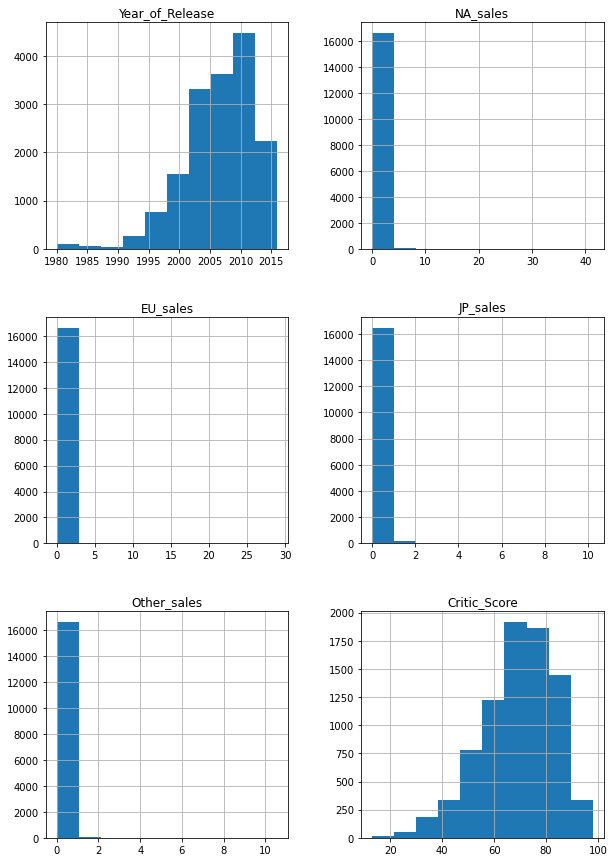

In [9]:
data.hist(figsize=(10,15))
plt.show() #построим общую гистограмму для всех числовых столбцов

In [10]:
data.duplicated().value_counts() # проверим строки полные на дубликаты


False    16715
dtype: int64

In [11]:
data['Name'].unique() #выведем уникальные значения и посмотрим наличие неявных дубликатов

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [12]:
data['Platform'].unique() #выведем уникальные значения и посмотрим наличие неявных дубликатов

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
data['Year_of_Release'].unique() #выведем уникальные значения и посмотрим наличие неявных дубликатов

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [14]:
data['Genre'].unique() #выведем уникальные значения и посмотрим наличие неявных дубликатов

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Неявных дубликатов не обнаружено.

**Вывод по шагу 1:**<a id='shag_1_conclusion'></a>
- В датафрейме требуется привести названия столбцов к единому регистру.
- Обнаружены пропуски в столбцах.
- Требуется изменить формат в столбце Year_of_Release на целые числа, а в столбце User_Score - на вещественные числа.
- Полные дубликаты в датафрейме отсутствуют. Неявные дубликаты отсутствуют.

### Шаг 2. Подготовка данных<a id='shag_2'></a>

#### Замена названий столбцов<a id='shag_2_1'></a>

In [15]:
data.columns = data.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [16]:
data.head(2) #проверим все ли ок.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


Приведение названий к нижнему регистру прошло корректно.

#### Предобработка столбца name<a id='shag_2_2'></a>

In [17]:
data['name'].unique() #посмотрим на названия игр

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [18]:
data[data['name'].isna() == True] #выведем строки с NaN в столбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце name отсутствуют два названия игры 1993 года, так же по этим играм отсутствует жанр. Возможно пропуски появились из-за того что игры старые и информация по ним отсутствует. Выведем игры на платформе GEN и посмотрим так ли это.

In [19]:
#выведем строки с платформой GEN
data[data['platform'] == 'GEN'] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
145,Sonic the Hedgehog 2,GEN,1992.0,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
832,NBA Jam,GEN,1992.0,Sports,1.75,0.25,0.00,0.05,NaN,NaN,NaN
960,Sonic & Knuckles,GEN,1994.0,Platform,1.24,0.43,0.03,0.12,NaN,NaN,NaN
996,Sonic the Hedgehog 3,GEN,1994.0,Platform,1.02,0.47,0.20,0.07,NaN,NaN,NaN
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN


По остальным строкам на платформе GEN такой проблемы нет.
Данные строки удаляем, т.к. для достижения задачи исследования две игры 1993 года окажут не сильное значение.

In [20]:
#удалим строки из датафрейма, в которых есть пропуски в столбце name
index = data[data['name'].isna() == True].index
data.drop(index, inplace=True)

In [21]:
data['name'].isna().sum() #проверим удаление

0

Предполагаю, что пропуски в столбце name появились из-за некорректной информации в самом источнике загрузки.
Удаление прошло корректно.

#### Предобработка столбца year_of_release <a id='shag_2_3'></a>

In [22]:
data['year_of_release'].unique() #посмотрим какие уникальные значения есть

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [23]:
data[data['year_of_release'].isna() == True] #выведем строки с NaN в столбце year_of_release

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце year_of_release 269 значений NaN. Проверим игры выходили для нескольких платформ или для одной.

In [24]:
data['name'].value_counts() #выведем сколько каких игр есть в датафреме

Need for Speed: Most Wanted              12
Ratatouille                               9
FIFA 14                                   9
Madden NFL 07                             9
LEGO Marvel Super Heroes                  9
                                         ..
Unending Bloody Call                      1
Story of Seasons                          1
Trick DS-han: Kakushi Kami no Sumukan     1
Nanashi no Game Me                        1
Persona Q: Shadow of the Labyrinth        1
Name: name, Length: 11559, dtype: int64

Есть игры, которые присутствуют несколько раз, а есть игры, которые присутствуют в датафрейме в единственной строке. Видимой взаимосвязи между строками с пропущенными значениями в столбце year_of_release не обнаружено, поэтому предполагаю, что пропуски в данных появились из-за технической проблемы при загрузке данных из открытых источников. Предположение, что у данных игр не было релиза отвергаем - т.к.выборочно несколько игр проверила отдельно в интернете и дата релиза есть. Предположение, что игры выходили в один год и слетел именно один год - тоже отвергаем после выборочной проверки в интеренете. 


In [25]:
#посмотрим сколько процентов составляют пропуски в столбце year_of_release от общего количества
data['year_of_release'].isna().sum()/data.shape[0]*100 

1.6095255190570215

Пропуски в столбце year_of_release составляют 1.6% от общего количества. Т.к.в дальнейшем нам понадобятся точные данные связанные с годом выхода игры, заменять значения с пропусками на мединные/средние года по соответствующим играм не корректно. Строки с пропусками удаляем.

In [26]:
data = data.dropna(subset=['year_of_release'])

In [27]:
data['year_of_release'].isna().sum() #проверим удаление пропусков в столбце year_of_release

0

In [28]:
data['year_of_release'] = data['year_of_release'].astype('int') #поменяем формат данных с float на int

In [29]:
data['year_of_release'].dtypes #проверим смену формата

dtype('int64')

#### Предобработка столбца genre <a id='shag_2_4'></a>

In [30]:
data['genre'].unique() #посмотрим какие уникальные значения есть

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [31]:
data['year_of_release'].isna().sum() #проверим наличие пропусков в столбце genre после предобработки в столбце name

0

Пропуски в столбце genre были только в строках с играми, которые удалили.

#### Предобработка столбца critic_score <a id='shag_2_5'></a>

In [32]:
data['critic_score'].unique() #посмотрим какие уникальные значения есть

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [33]:
data[data['critic_score'].isna() == True] #выведем строки с NaN в столбце critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [34]:
#посмотрим сколько процентов составляют пропуски в столбце critic_score от общего количества
data['critic_score'].isna().sum()/data.shape[0]*100 

51.453417659936754

Пропуски в столбце critic_score составляют 51.4 %. Предполагаю, что такое количество пропусков появилось потому что по играм может отсутствовать данный рейтинг или игра только вышла и еще не успела получить свой рейтинг. Пропуски заменим на значение -1, т.к. отрицательного значения в рейтинге быть не может, в дальнейшем эти строки будем просто исключать.

In [35]:
data['critic_score'] =data['critic_score'].replace(np.nan, -1) #заменим пропуски в столбце critic_score на пустоты


In [36]:
data['critic_score'].isna().sum()/data.shape[0]*100 #проверим процент пропусков в столбце critic_score

0.0

In [37]:
data.head(10) #посмотрим как выглядит датафрейм после изменения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN


Пропуски в столбце critic_score заменили на пустоты.

#### Предобработка столбца user_score <a id='shag_2_6'></a>

In [38]:
data['user_score'].unique() #посмотрим какие уникальные значения есть

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных присутствует значение tbd, оно используется, если какая-то информация еще не определена или решение по вопросу не принято. 

In [39]:
data[data['user_score'].isna() == True] #выведем строки с NaN в столбце user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN


In [40]:
data['user_score'].isna().sum()/data.shape[0]*100 #проверим процент пропусков в столбце user_score

40.166626125030405

In [41]:
data[data['user_score']=='tbd'].shape[0]/data.shape[0]*100 #проверим процент значений tbd в столбце user_score

14.449039163220629

In [42]:
data[data['user_score']=='tbd'] # посмотрим на строки с tbd в столбце user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


В столбце user_score 40.1% пропусков и 14.4% значений tbd.
Предполагаю, что пропуски появились потому что по играм может отсутствовать данный рейтинг или игра только вышла и еще не успела получить свой рейтинг. Предполагаю, что значения tbd появились потому что данные игры ожидают оценки или оценка еще не подтвердилась. Пропуски и значения tbd заполняем значением -1, т.к. отрицательного значения в рейтинге быть не может, в дальнейшем эти строки будем просто исключать.

In [43]:
data['user_score'] =data['user_score'].replace(np.nan, -1) #заменим пропуски в столбце user_score на -1


In [44]:
data['user_score'] =data['user_score'].replace('tbd', -1) #заменим значения tbd в столбце user_score на -1


In [45]:
data['user_score'] = data['user_score'].astype(float) #поменяем формат данных с object на float

In [46]:
data['user_score'].unique() #проверим какие теперь уникальные значения есть в столбце user_score

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [47]:
data['user_score'].dtypes #проверим смену формата

dtype('float64')

In [48]:
data['user_score'].isna().sum() #проверим пропуски в столбце user_score

0

#### Предобработка столбца rating <a id='shag_2_7'></a>

In [49]:
data['rating'].unique() #посмотрим какие уникальные значения есть в столбце rating

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [50]:
data['rating'].isna().sum() #выведем количество строк с NaN в столбце rating

6676

In [51]:
data[data['rating'].isna() == True] #выведем строки с NaN в столбце rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


In [52]:
data['rating'].isna().sum()/data.shape[0]*100 #проверим процент пропусков в столбце rating

40.59839455120409

Пропуски в столбце rating составляют 40.6%. Т.к. данные отсутствуют по играм вышедшим в разные годы и этот рейтинг выставляет организация ESRB, предполагаю, что пропуски в стобце rating повились из-за того, что по данным играм еще не выставлен рейтинг. Пропуски заменим на значение "отсутствует".

In [53]:
data['rating'] = data['rating'].fillna('отсутствует') #заменим пропуске в столбце rating на значение "отсутствует" 

In [54]:
data['rating'].isna().sum() #проверим количество строк с NaN в столбце rating

0

Пропуски отсутствуют.

#### Суммарные продажи во всех регионах <a id='shag_2_8'></a>

In [55]:
#добавим в датафрейм столбец, в котором будут суммарные продажи во всех регионах. 
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales'] 

In [56]:
data.head(10) #посмотрим обновленный датафрейм

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,отсутствует,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,отсутствует,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,отсутствует,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,отсутствует,28.31


Добавление столбца с общей суммой прошло успешно.

**Вывод по шагу 2:**<a id='shag_2_conclusion'></a>
- Привели названия столбцов к нижнему регистру.
- Предполагаю, что пропуски в столбце name появились из-за некорректной информации в самом источнике загрузки. Данные строки удаляем, т.к. для достижения задачи исследования две игры 1993 года окажут не сильное значение.
- Видимой взаимосвязи между строками с пропущенными значениями в столбце year_of_release не обнаружено, поэтому предполагаю, что пропуски в данных появились из-за технической проблемы при загрузке данных из открытых источников. Пропуски в столбце year_of_release составляют 1.6% от общего количества. Т.к.в дальнейшем нам понадобятся точные данные связанные с годом выхода игры, заменять значения с пропусками на мединные/средние года по соответствующим играм не корректно. Пропуски удалили, формат float64 замененили на int.
- Пропуски в столбце critic_score составляют 51.4 %. Предполагаю, что такое количество пропусков появилось потому что по играм может отсутствовать данный рейтинг или игра только вышла и еще не успела получить свой рейтинг. Пропуски заменили на значение -1, т.к. отрицательного значения в рейтинге быть не может, в дальнейшем эти строки будем просто исключать.
- В столбце user_score 40.1% пропусков и 14.4% значений tbd. Предполагаю, что пропуски появились потому что по играм может отсутствовать данный рейтинг или игра только вышла и еще не успела получить свой рейтинг. Предполагаю, что значения tbd появились потому что данные игры ожидают оценки или оценка еще не подтвердилась. Пропуски и значения tbd заполнили значением -1, т.к. отрицательного значения в рейтинге быть не может, в дальнейшем эти строки будем просто исключать.
- Пропуски в столбце rating составляют 40.6%. Т.к. данные отсутствуют по играм вышедшим в разные годы и этот рейтинг выставляет организация ESRB, предполагаю, что пропуски в стобце rating повились из-за того, что по данным играм еще не выставлен рейтинг. Пропуски заменили на значение "отсутствует".
- Добавили столбец all_sales, который содержит суммарные продажи во всех регионах.

### Шаг 3. Исследовательский анализ данных <a id='shag_3'></a>

#### Сколько игр выпускалось в разные годы<a id='shag_3_1'></a>

Важны ли данные за все периоды?

In [57]:
data['year_of_release'].value_counts() #посмотрим сколько игр выпускалось в разные года

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

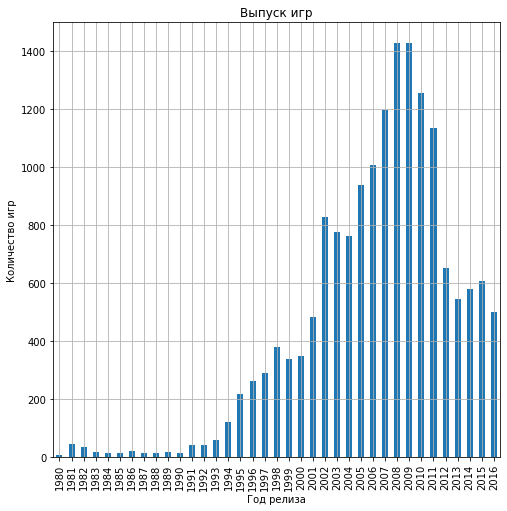

In [58]:
#построим гистограмму выхода игр
data['year_of_release'].value_counts().sort_index(ascending=True).plot(
    y='year_of_release',
    kind='bar',
    figsize = (8,8),
    grid=True,
    title='Выпуск игр',
    xlabel='Год релиза',
    ylabel='Количество игр',


)
plt.show()

Вывод: Как видно по гистограмме и данным выше, до 1994 года игр выходило совсем немного, предполагаю, что это связано с тем, что компьютеры, игровые приставки были не сильно распространены. Данные за все периоды важны с точки зрения рассмотрения динамики, по ним мы можем увидеть, что с 1980 года по 2001 год шло постепенное увеличение релиза игр, затем с 2001 года скачок и опять постепенный рост до 2006 года. С 2007 по 2010 год пик релиза игр. И с 2011 по настоящее время шел спад релиза игр. Т.к. создание игры и ее выход занимают определенное время, предполагаю, что спад с 2011 года был связан с экономической ситуацией с 2009 по 2013 года.

Однако, я считаю что для достижения поставленной задачи данные за все периоды не требуются, а именно данные до 2011 года. Т.к. до 2001 года технические возможности потребителей сильно отличаются от возможностей после. Компьютер и приставки стали более распространены, возможности для рекламы так же изменились. А с 2001 года до 2011 года включительно был рост и пик, последние года значения сильно ниже пиковых, поэтому рассматриваться стоит более актуальную информацию.

#### Как менялись продажи по платформам <a id='shag_3_2'></a>
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

*Посмотрим как менялись продажи по платформам:*

In [59]:
#сгруппируем данные по платформе и выведем суммарные продажи по всем годам
data_group = data.groupby('platform')['all_sales'].sum().sort_values()

In [60]:
data_group #посмотрим на распределение

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: all_sales, dtype: float64

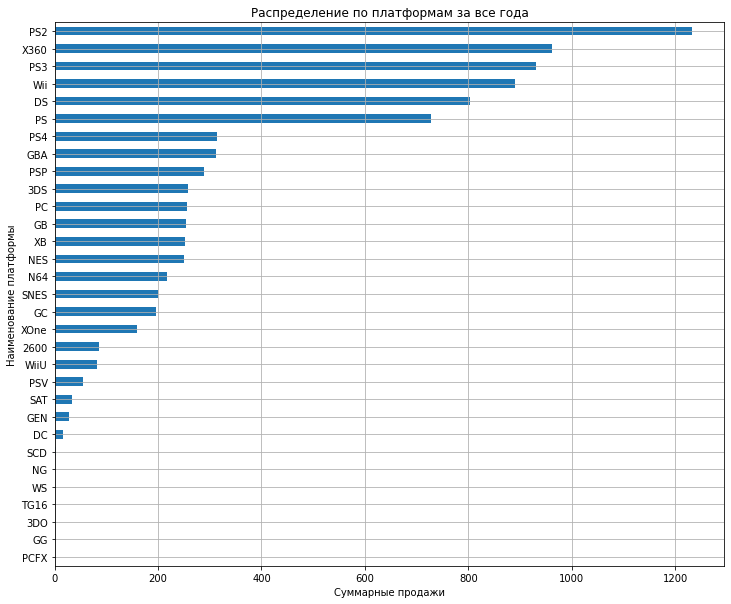

In [61]:
data_group.plot(
    kind='barh',
    figsize = (12,10),
    grid=True,
    title='Распределение по платформам за все года'


)
plt.xlabel('Суммарные продажи')
plt.ylabel('Наименование платформы')
plt.show()

Как видно, за все имеющиеся года максимальные продажи во всех регионах были у платформы PS2, X360, PS3, Wii, DS, PS.

In [62]:
#сгруппируем данные по платформе и году, выведем суммарные продажи по всем годам
data_group_year = data.groupby(['platform','year_of_release'])['all_sales'].sum().sort_values(ascending=False) 

In [63]:
data_group_year.head(30) #посмотрим на сгруппированные данные по платформе и году с суммарными продажами по всем годам

platform  year_of_release
PS2       2004               211.81
Wii       2009               206.97
PS2       2002               205.38
          2003               184.31
Wii       2008               171.32
X360      2010               170.03
PS        1998               169.49
PS2       2001               166.43
          2005               160.66
PS3       2011               156.78
Wii       2007               152.77
DS        2007               146.94
          2008               145.31
PS        1999               144.53
X360      2011               143.84
PS3       2010               142.17
Wii       2006               137.15
PS        1997               136.17
X360      2008               135.26
PS3       2009               130.93
DS        2005               130.14
Wii       2010               127.95
X360      2009               120.29
DS        2006               119.81
          2009               119.54
PS4       2015               118.90
PS3       2008               118.52
  

Как видно из таблицы выше распределение по годам все равно дает те же платформы.

*Выберем платформы с наибольшими суммарными продажами и построим распределения по годам:*

In [64]:
#делаем срез с топ 6 платформами с максимальными продажами по всем годам
data_max_sum = data.query('platform in ["PS2","X360","PS3","Wii","DS", "PS"]').pivot_table(
    index=['year_of_release'],
    columns='platform', 
    values='all_sales', 
    aggfunc='sum' 
)

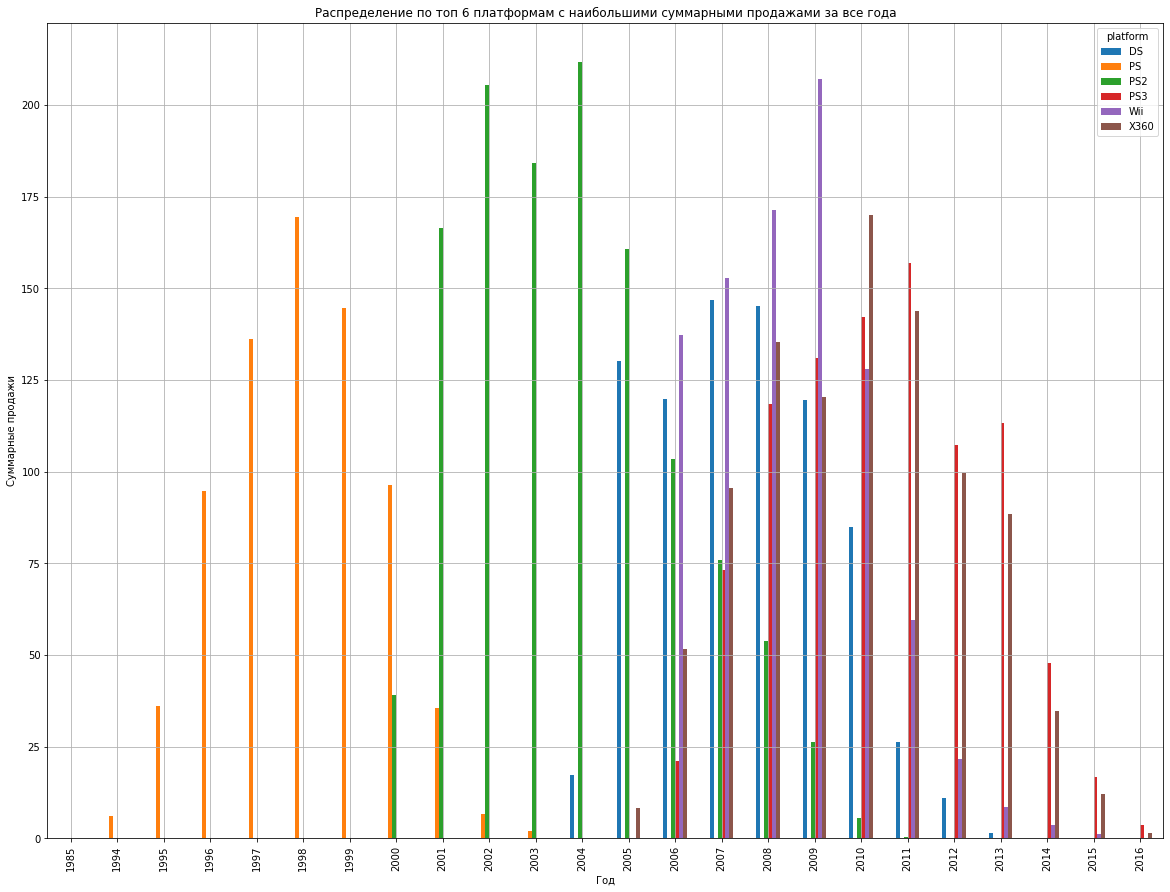

In [65]:
#построим столбчатый график по срезу с топ 6 платформами с максимальными продажами по всем годам
data_max_sum.plot(
    kind='bar',
    figsize = (20,15),
    grid=True,
    legend=True,
    title='Распределение по топ 6 платформам с наибольшими суммарными продажами за все года',
    xlabel='Год',
    ylabel='Суммарные продажи',


)
plt.show()

*За какой характерный срок появляются новые и исчезают старые платформы?:*
По графику "Распределение по платформам с наибольшими суммарными продажами за все года" видно, что: 
* платформа PS появилась и продавалась с 1994 года по 2003 - 9 лет,
* платформа PS2 появилась и продавалась с 2000 года по 2010 - 10 лет,
* платформа DS появилась и продавалась с 2004 года по 2013 - 9 лет,
* платформа X360 появилась и продавалась с 2005 года по 2015 - 10 лет,
* платформа Wii появилась и продавалась с 2006 года по 2015 - 9 лет,
* платформа PS3 появилась и продавалась с 2006 года по 2016 - 10 лет,
Как видим платформы появляются и исчезают за 9-10 лет. При этом в промежутке с 2005 по 2013 год на рынке присутствовали от 3-х до 5-ти платформ. 


#### Возьмите данные за соответствующий актуальны период <a id='shag_3_3'></a>
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


В предыдущем пункте мы увидели на графике как распределяются появления и исчезновение платформ. Стоит рассмотреть какие платформы запускаются сейчас и исходя из этого определить какой период мы будем считать актуальным.

In [66]:
#выведем платформы, которые запускаются в 2016 году
data[data['year_of_release']==2016]['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [67]:
#делаем срез с топ платформами с максимальными продажами по всем годам и теми, что выпускаются в 2016
#DS,PS,PS2 исключаем, т.к. к настоящей дате они уже исчезли
data_max_sum = data.query('platform in ["X360","PS3","Wii", "PC","PSV","WiiU","XOne","3DS","PS4"]').pivot_table(
    index=['year_of_release'],
    columns='platform', 
    values='all_sales', 
    aggfunc='sum' 
)

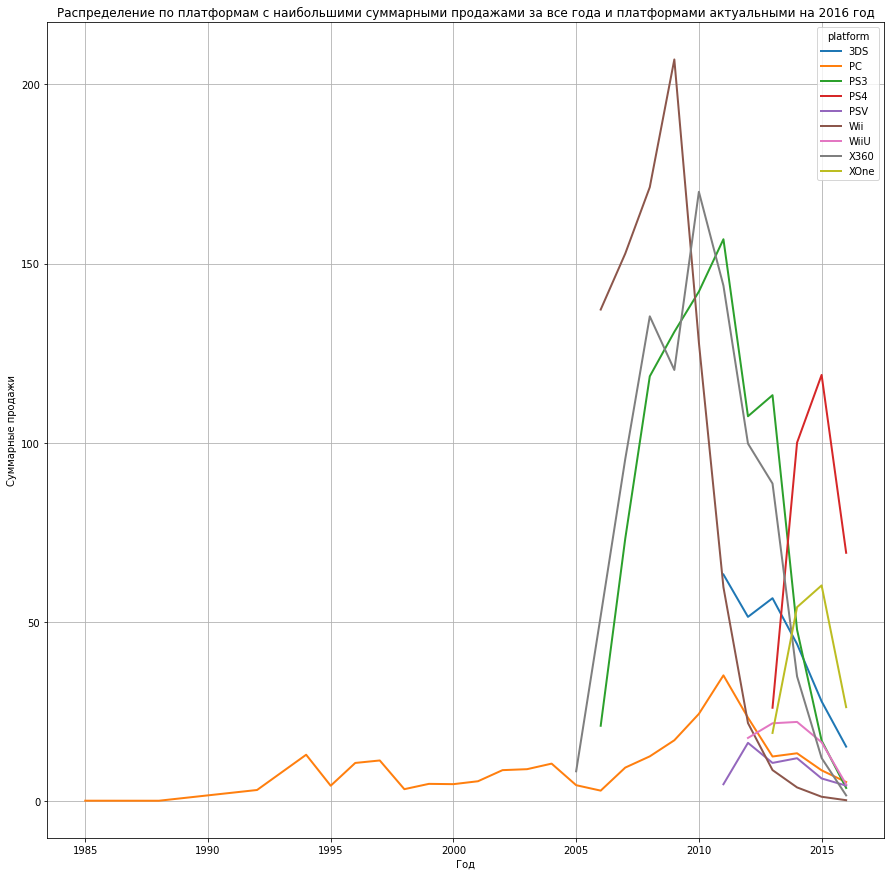

In [68]:
#построим столбчатый график
data_max_sum.plot(
    figsize = (15,15),
    grid=True,
    legend=True,
    title='Распределение по платформам с наибольшими суммарными продажами за все года и платформами актуальными на 2016 год',
    xlabel='Год',
    ylabel='Суммарные продажи',
    linewidth=2


)
plt.show()

Исключим PC, т.к. по графику видно что данная платформа присутствует с самых ранних годов, пик приходится на 2011 год и далее идет спад.

In [69]:
#делаем срез с топ платформами с максимальными продажами по всем годам и теми, что выпускаются в 2016
#DS,PS,PS2 исключаем, т.к. к настоящей дате они уже исчезли
#PC исключаем т.к.длительный тренд идет на спад
data_max_sum_2016 = data.query('platform in ["X360","PS3","Wii","PSV","WiiU","XOne","3DS","PS4"]').pivot_table(
    index=['year_of_release'],
    columns='platform', 
    values='all_sales', 
    aggfunc='sum' 
)

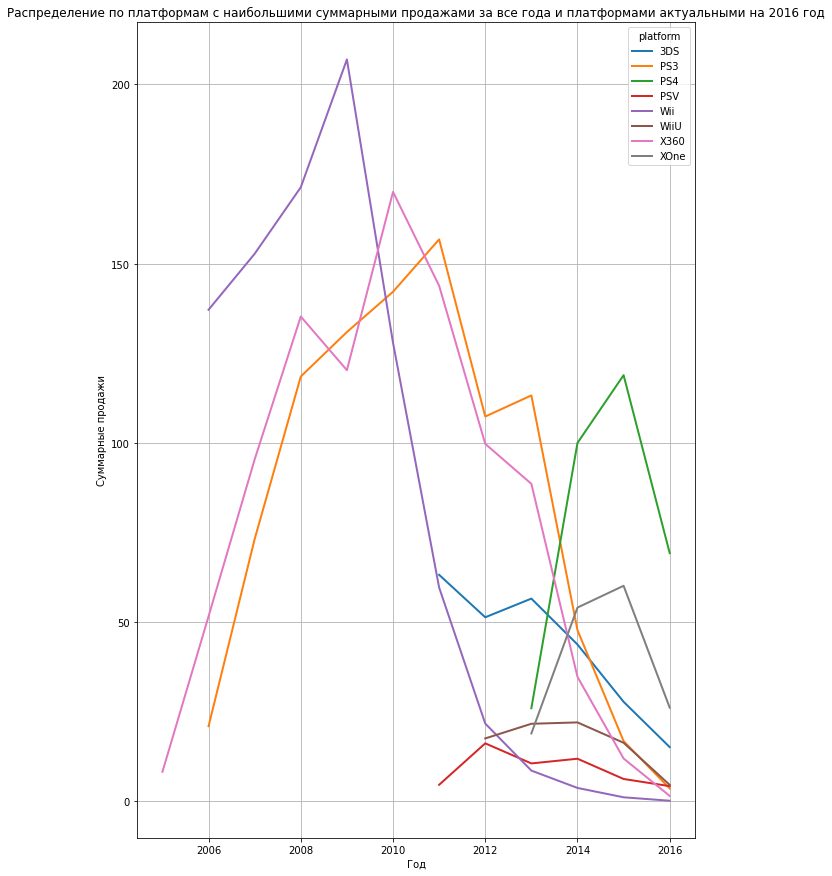

In [70]:
#построим столбчатый график
data_max_sum_2016.plot(
    figsize = (10,15),
    grid=True,
    legend=True,
    title='Распределение по платформам с наибольшими суммарными продажами за все года и платформами актуальными на 2016 год',
    xlabel='Год',
    ylabel='Суммарные продажи',
    linewidth=2


)
plt.show()

Итак, как мы видим по графику к 2016 году у нас 9 платформ(+PC), суммарные продажи по которым идут на спад. XOne и PS4 в 2015 дошли до пика в 2015, но к 2016 опустились. 
Актуальным периодом для построения прогноза на 2017 год будем считать период с 2014 года.

#### Не учитывайте в работе данные за предыдущие годы <a id='shag_3_4'></a>


In [71]:
# создаем датафрейм с соответствующим актуальным периодом
data_actual = data.query('year_of_release>=2014')

#### Какие платформы лидируют по продажам, растут или падают?<a id='shag_3_5'></a>
Выберите несколько потенциально прибыльных платформ.

In [72]:
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,отсутствует,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,отсутствует,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,отсутствует,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,отсутствует,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,отсутствует,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,отсутствует,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,отсутствует,0.01


In [73]:
#сгруппируем по платформе и выведем данные по продажам
data_actual_group = data_actual.groupby('platform')[
    'na_sales',
    'eu_sales',
    'jp_sales',
    'other_sales',
    'all_sales'
].sum().sort_values(by='all_sales',ascending=False)
display(data_actual_group)

/tmp/ipykernel_219/574129739.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_actual_group = data_actual.groupby('platform')[


,na_sales,eu_sales,jp_sales,other_sales,all_sales
platform,,,,,
PS4,98.61,130.04,15.02,44.48,288.15
XOne,81.27,46.25,0.32,12.52,140.36
3DS,22.64,16.12,44.24,3.68,86.68
PS3,22.05,25.54,11.22,9.37,68.18
X360,28.30,15.49,0.08,4.35,48.22
WiiU,19.36,13.15,7.31,3.16,42.98
PC,7.23,17.97,0.00,1.85,27.05
PSV,2.52,3.53,14.54,1.81,22.40
Wii,2.08,2.59,0.00,0.40,5.07


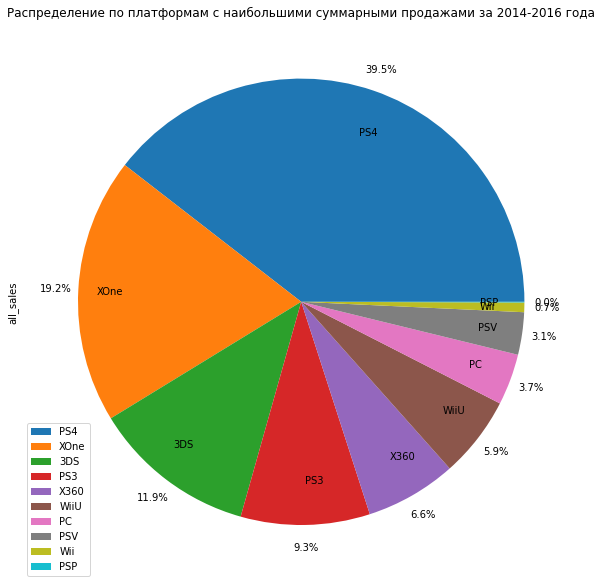

In [74]:
#построим круговой график по платформам и суммарным продажам
data_actual_group['all_sales'].plot(
    kind='pie',
    figsize = (10,15),
    legend=True,
    title='Распределение по платформам с наибольшими суммарными продажами за 2014-2016 года',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.8


)
plt.show()

По данным таблицы и по круговому графику видно, что максимальное количество продаж у PS4 - 39.5%, XOne - 19.2%, 3DS - 11.9%, PS3 - 9.3%, X360 - 6.6%, WiiU- 5.9%.

In [75]:
#делаем сводную таблицу по годам, чтобы увидеть тренд 
data_actual_pivot = data_actual.pivot_table(
    index=['year_of_release'],
    columns='platform', 
    values='all_sales', 
    aggfunc='sum' 
)

In [76]:
data_actual_pivot #выведем сводную таблицу

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Как мы видим PSP перестали продаваться в 2016 году вообще.

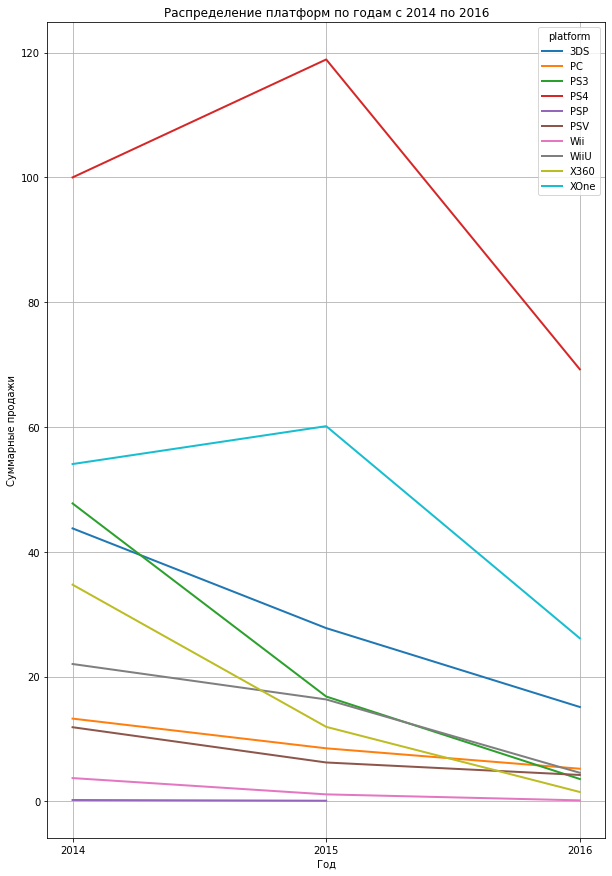

In [77]:
#построим график по сводной таблице 
ax=data_actual_pivot.plot(
    figsize = (10,15),
    grid=True,
    legend=True,
    title='Распределение платформ по годам с 2014 по 2016',
    xlabel='Год',
    ylabel='Суммарные продажи',
    linewidth=2,
)
ax.set_xticks([2014, 2015, 2016])

plt.show()

- Общая динамика к 2016 году - это спад, однако стоит учесть, что в водных данных сейчас декабрь 2016 года, а значит суммарные продажи в декабре будут выше чем мы видим сейчас, т.к. рождественские и новогодние праздники приносят хорошие продажи.
- К **потенциально прибыльным платформам**, на мой взгляд, можно отнести **PS4, XOne, 3DS, WiiU, PC, PSV**:
  - Платформа PS4 появилась в 2013 году, продажи за 2014-2014 года составили - 39.5%.
  - Платформа XOne появилась в 2013 году, продажи за 2014-2014 года составили - 19.2%.
  - Платформа 3DS появилась в 2011 году, продажи за 2014-2014 года составили- 11.9%,
  - Платформа WiiU появилась в 2012 году, продажи за 2014-2016 года составили - 5.9%.
  - Платформа PC как мы видим на графике "Распределение по платформам с наибольшими суммарными продажами за все года и платформами актуальными на 2016 год" и на графике "Распределение платформ по годам с 2014 по 2016" дает +- стабильные продажи и с рынка уходить пока не планирует, продажи за 2014-2016 года составили 3.7 %.
  - Платформа PSV появилась в 2011 году, продажи за 2014-2016 года составили 3.1 %.
- К платформам **идущим на спад**, на мой взгляд можно отнести **PS3, X360, Wii, PSP**:
  - Платформа PS3 за 2014-2016 год принес хорошие суммарные продажи - 9.3%, однако как мы уже рассмотрели выше эта платформа появилась в 2006 году, в среднем платформа существует 9-10 лет, а значит в 2017 году велика вероятность, что продаж по данной платформе не будет или будет идти так же спад. Это же мы видим на графике "Распределение платформ по годам с 2014 по 2016" - спад.
  - Платформа X360 - за 2014-2016 год принесла хорошие суммарные продажи - 6.6%, однако платформа появилась в 2005 году, мощный пик по продажам у нее был в 2010 году, сейчас мы видим на графике "Распределение платформ по годам с 2014 по 2016"  у платформы идет спад. 
  - Платформа Wii за 2014-2016 год принесла хорошие суммарные продажи -  0.7%, появилась в 2006 году, пик пришелся на 2009 год, сейчас мы видим на графике "Распределение платформ по годам с 2014 по 2016"  у платформы идет спад. 
  - Платформа PSP очевидно уже ушла с рынка, в 2016 году продаж по ней нет.

#### Постройте график «ящик с усами»<a id=shag_3_6></a>
 по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [78]:
#сделаем срез датафрейма по актуальным платформам и сохраним в переменную data_actual_profit
data_actual_profit = data_actual.query('platform in ["PS4", "XOne", "3DS", "WiiU", "PC", "PSV"]')

In [79]:
#посмотрим распредение суммарных продаж по потенциально прибыльным платформам
data_actual_profit.groupby('platform')['all_sales'].sum().sort_values(ascending=False) 

platform
PS4     288.15
XOne    140.36
3DS      86.68
WiiU     42.98
PC       27.05
PSV      22.40
Name: all_sales, dtype: float64

In [80]:
# посмотрим статистические данные по суммарным продажам по платформам
data_actual_profit.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


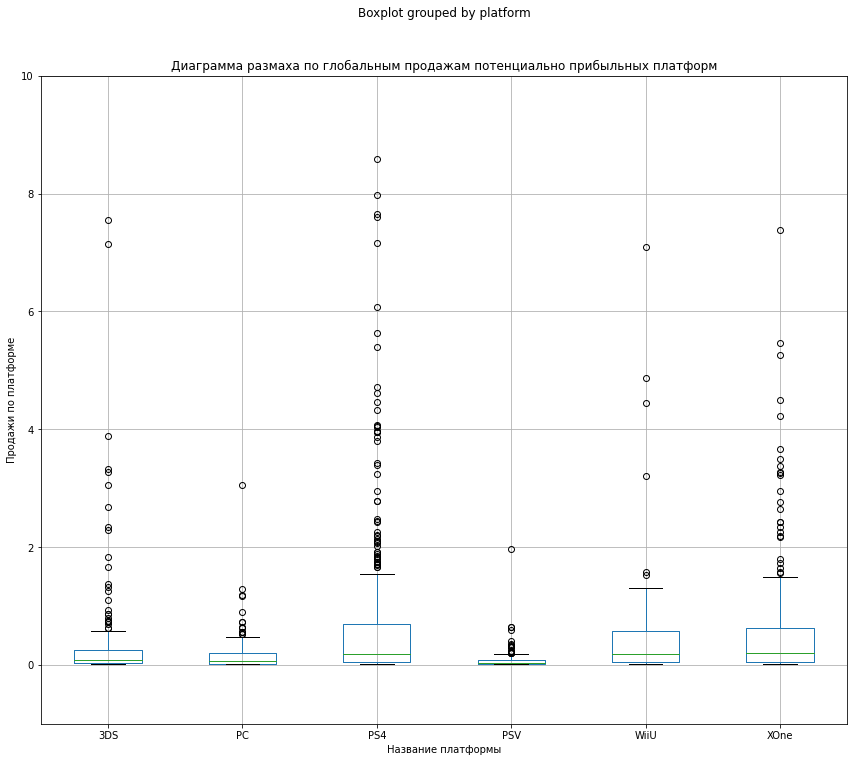

In [81]:
#построим ящики с усами по потенциально прибыльным платформам
data_actual_profit.boxplot(
    column='all_sales', 
    by='platform',
    grid=True,
    figsize = (14,12)

)
plt.xlabel('Название платформы')
plt.ylabel('Продажи по платформе')
plt.title('Диаграмма размаха по глобальным продажам потенциально прибыльных платформ')
plt.ylim(-1,10)
plt.show()

По диаграмме размаха по глобальным продажам потенциально прибыльных платформ видно, что у каждой платформы есть игры, которые дали выбросы, где-то они редкие, где-то частые. Например на платформе 3DS и PS4 самые большие выбросы.  Однако мы не будем отбрасывать эти данные, потому что игра действительно могла быть настолько успешной. Там где частота выбросов выше - макисмальные продажи по платформе.
В целом межквартильный размах укладывается от 0.02 до 0.8, а максимальные значения "усов"не превышают 1.8.


#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков<a id='shag_3_7'></a>
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качестве популярной платформы будем рассматривать PS4, т.к. по ней на 2016 год самые лучшие продажи.

In [82]:
# создадим датафрейм по оценке критиков (с исключенным значением -1) в котором будет только платформа PS4
PS4_platform_critic = data_actual_profit[(data_actual_profit['platform']=='PS4')  & (data_actual_profit['critic_score']!=-1)] 

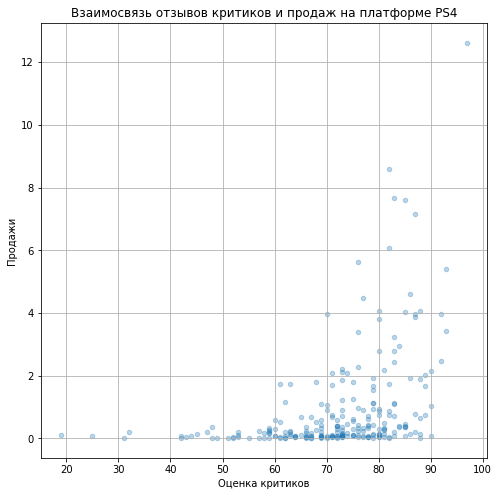

In [83]:
#построим диаграмму рассеяния по платформе PS4 и оценке критиков, исключими значение -1
PS4_platform_critic.plot(
    kind='scatter',
    x='critic_score',
    y='all_sales',
    figsize=(8,8), 
    grid=True,
    alpha=0.3, 
    title='Взаимосвязь отзывов критиков и продаж на платформе PS4'


)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [84]:
# посчитаем коэффициент корреляции между оценкой критиков и продажами
critic_corr = PS4_platform_critic['critic_score'].corr(PS4_platform_critic['all_sales'])
print('Коэффициент корреляции между оценкой критиков и продажами составляет:',critic_corr)

Коэффициент корреляции между оценкой критиков и продажами составляет: 0.40266141068104083


In [85]:
# создадим датафрейм по оценке пользователей (с исключенным значением -1) в котором будет только платформа PS4
PS4_platform_user = data_actual_profit[(data_actual_profit['platform']=='PS4')  & (data_actual_profit['user_score']!=-1) ]

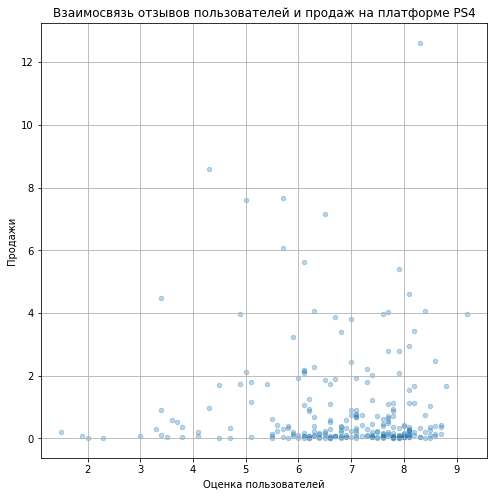

In [86]:
#построим диаграмму рассеяния по платформе PS4 и оценке пользователей, исключими значение -1
PS4_platform_user.plot(
    kind='scatter',
    x='user_score',
    y='all_sales',
    figsize=(8,8), 
    grid=True,
    alpha=0.3, 
    title='Взаимосвязь отзывов пользователей и продаж на платформе PS4'


)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [87]:
# посчитаем коэффициент корреляции между оценкой пользователей и продажами
user_corr = PS4_platform_user['user_score'].corr(PS4_platform_user['all_sales'])
print('Коэффициент корреляции между оценкой пользователей и продажами составляет:',user_corr)

Коэффициент корреляции между оценкой пользователей и продажами составляет: -0.040131589472697356


Коэффициент корреляции между оценкой критиков и продажами составляет: 0.40266141068104083. Корреляция положительная, прямая зависимость - с увеличением оценки критиков увеличиваются продажи. Оценка критиков влияет на продажи, но влияние не сильное.
Коэффициент корреляции между оценкой пользователей и продажами составляет: -0.040131589472697356. Корреляция отрицательная, обратная зависимость - с увеличением оценки пользователей продажи падают. Оценка пользователей влияет на продажи, но влияние слабое. 


#### Соотнесите выводы с продажами игр на других платформах<a id='shag_3_8'></a>


Посмотрим распределение по изначальному датафрейму со всеми платформами, т.к. распределение по потенциально прибыльным платформам за актуальный период (2014-2016 гг) были рассмотрены в пункте [3.6 "Постройте ящик с усами"](#shag_3_6)

In [88]:
data.groupby('platform')['all_sales'].describe() #выведем статистические данные по всем платформам за весь период

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


In [89]:
data_group #выведем продажи по всем платформам за весь период

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: all_sales, dtype: float64

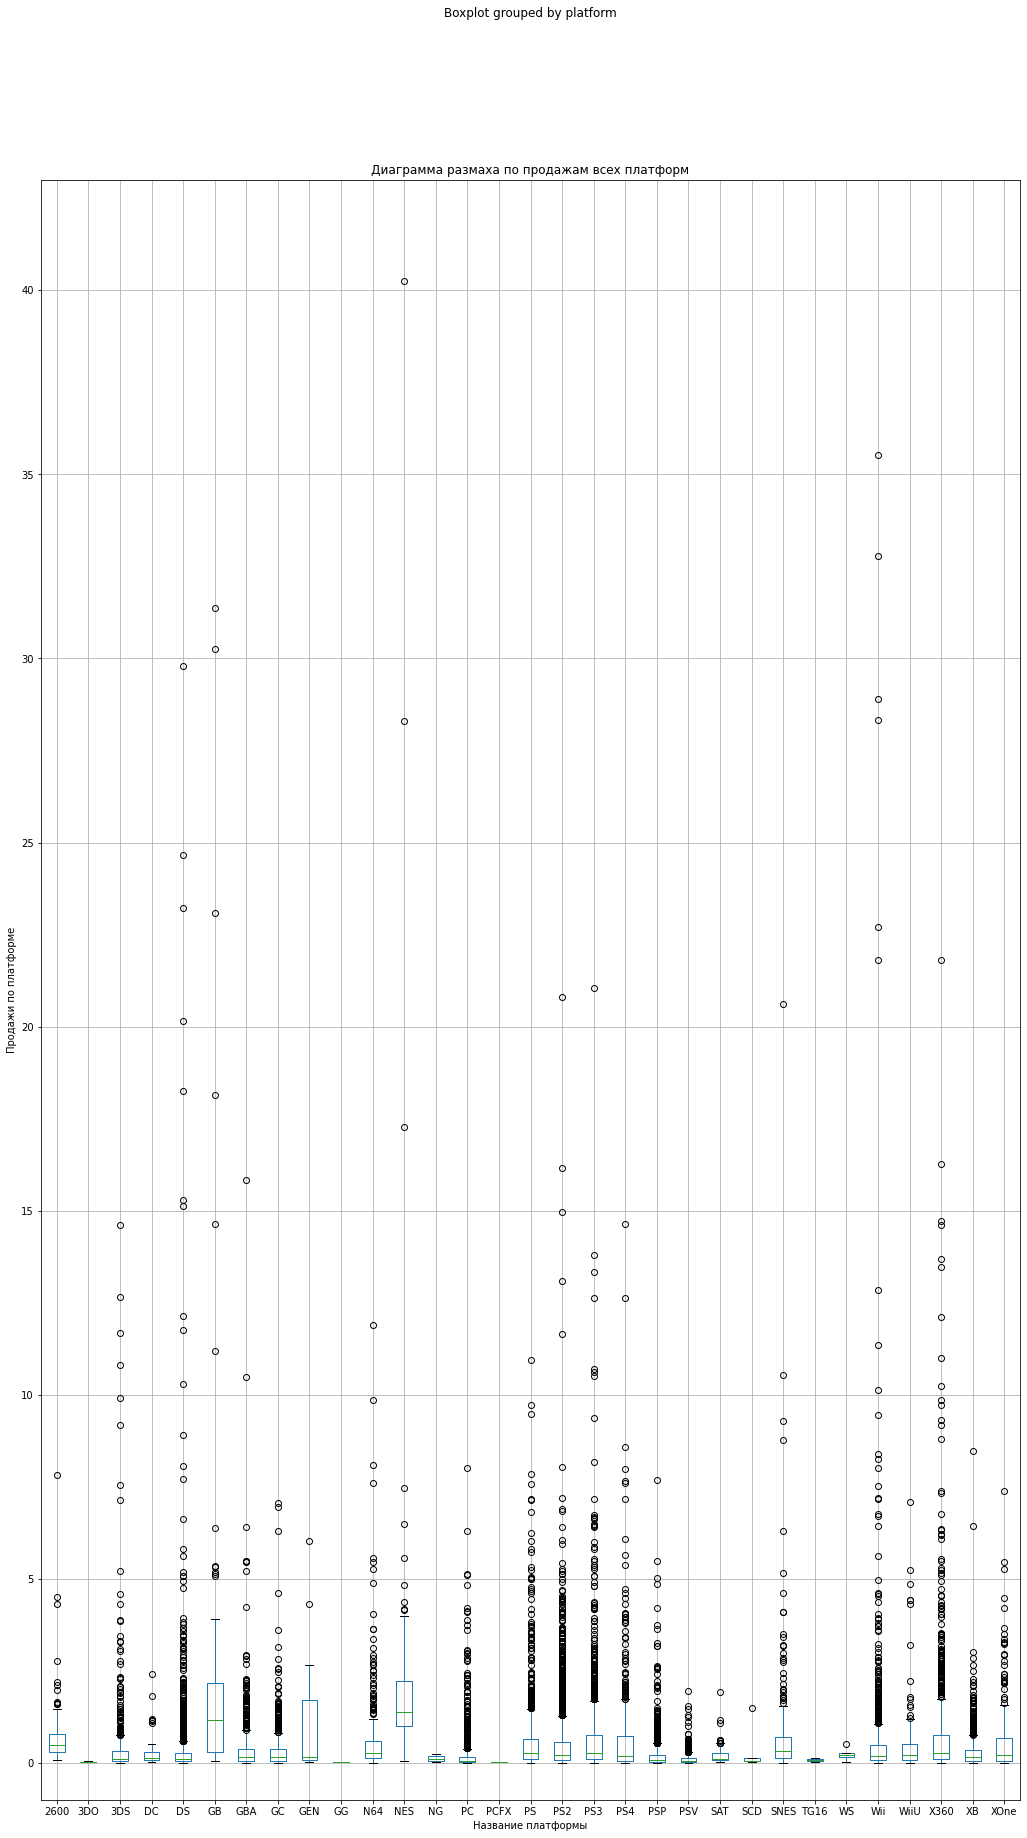

In [90]:
#построим ящики с усами по всем платформам за весь период
data.boxplot(
    column='all_sales', 
    by='platform',
    grid=True,
    figsize = (17,30)

)
plt.xlabel('Название платформы')
plt.ylabel('Продажи по платформе')
plt.title('Диаграмма размаха по продажам всех платформ')
plt.ylim(-1,43)
plt.show()

Как видно по общей диаграме размаха на некоторых платформах были очень выраженные выбросы, например платформа Wii. В нашем случае это показатель того, что на платформе какая-то игра была очень популярной у пользователей, поэтому выбросы не удаляем.
Рассмотрим сами "ящики с усами" более подробно.

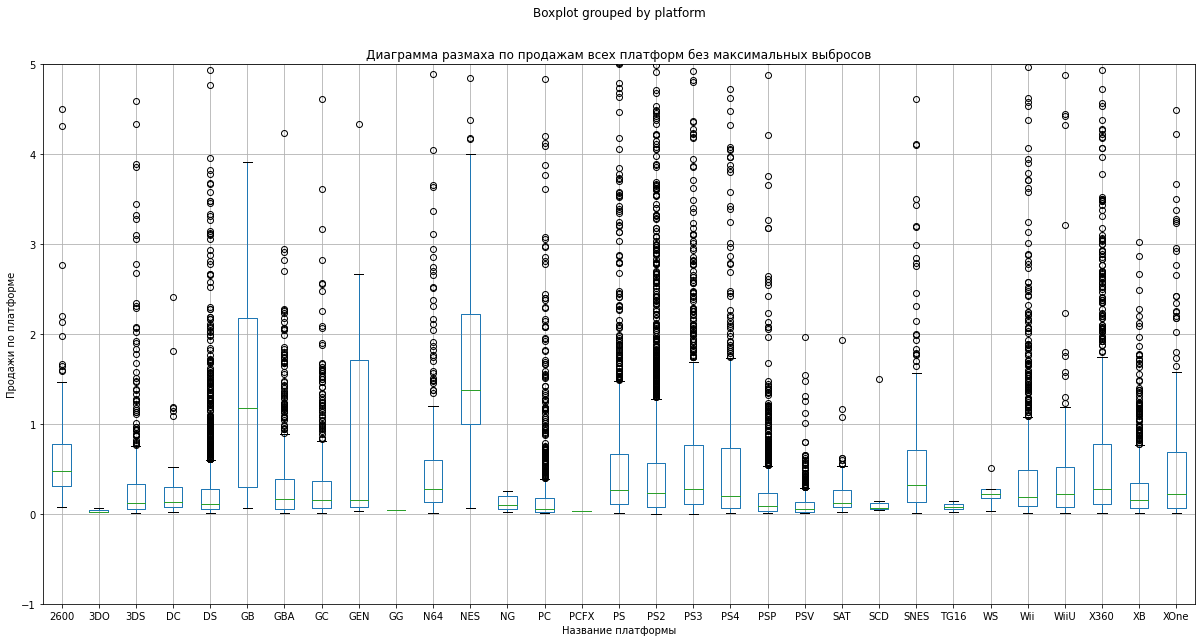

In [91]:
#построим ящики с усами по всем платформам за весь период,без максимальных выбросов
data.boxplot(
    column='all_sales', 
    by='platform',
    grid=True,
    figsize = (20,10)

)
plt.xlabel('Название платформы')
plt.ylabel('Продажи по платформе')
plt.title('Диаграмма размаха по продажам всех платформ без максимальных выбросов')
plt.ylim(-1,5)
plt.show()

На диаграмме размаха по продажам всех платформ без максимальных выбросов за весь период видно, что на некоторых платформах более однородные продажи, например XB, WS, NG, возможно это связано с тем, что на этих платформах выпускалось немного различных игр. Есть платформы, где однородных продаж не было, например GB, NES, GEN, возможно они выпускали много разных игр, которые продавались по-разному. Все платформы, приносящие максимальный доход, видны по количествам выбросов за пределами "усов".

**Посмотрим взаимосвязь между всеми платформами и оценками критиков и пользователей за весь период.**

In [92]:
data_1 = data[data['critic_score']!=-1] # создадим датафрейм, в котором исключим значения -1 в оценках критиков

data_2 = data[data['user_score']!=-1] # создадим датафрейм, в котором исключим значения -1 в оценках пользователей


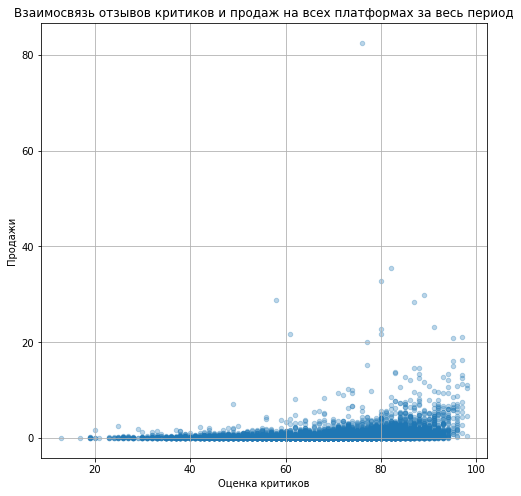

In [93]:
#построим диаграмму рассеяния по всем платформам за весь период и оценке критиков, исключив значение -1
data_1.plot(
    kind='scatter',
    x='critic_score',
    y='all_sales',
    figsize=(8,8), 
    grid=True,
    alpha=0.3, 
    title='Взаимосвязь отзывов критиков и продаж на всех платформах за весь период'


)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [94]:
# посчитаем коэффициент корреляции между оценкой критиков по всем платформам за весь период и продажами
critic_corr_1 = data_1['critic_score'].corr(data_1['all_sales'])
print('Коэффициент корреляции между оценкой критиков по всем платформам и продажами за весь период составляет:',critic_corr_1)

Коэффициент корреляции между оценкой критиков по всем платформам и продажами за весь период составляет: 0.2453488454741138


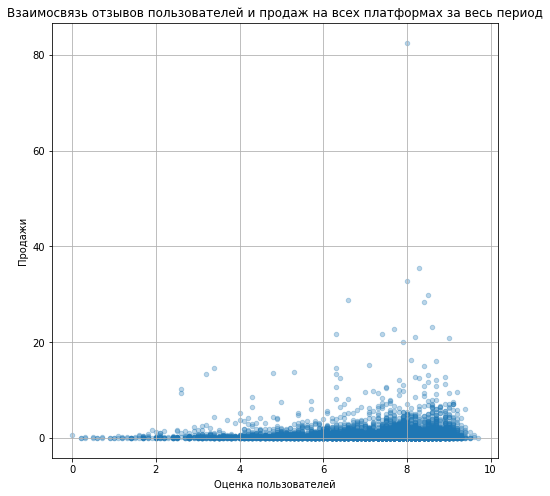

In [95]:
#построим диаграмму рассеяния по всем платформам за весь период и оценке пользователей, исключив значение -1
data_2.plot(
    kind='scatter',
    x='user_score',
    y='all_sales',
    figsize=(8,8), 
    grid=True,
    alpha=0.3, 
    title='Взаимосвязь отзывов пользователей и продаж на всех платформах за весь период'


)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [96]:
# посчитаем коэффициент корреляции между оценкой пользователей и продажами
user_corr_2 = data_2['user_score'].corr(data_2['all_sales'])
print('Коэффициент корреляции между оценкой пользователей по всем платформам и продажами за весь период составляет:',user_corr_2)

Коэффициент корреляции между оценкой пользователей по всем платформам и продажами за весь период составляет: 0.08798399271321647


Коэффициент корреляции между оценкой критиков по всем платформам и продажами за весь период составляет: 0.2453488454741138. Корреляция положительная, прямая зависимость - с увеличением оценки критиков увеличиваются продажи. Оценка критиков влияет на продажи, но влияние слабое.
Коэффициент корреляции между оценкой пользователей по всем платформам и продажами за весь период составляет: 0.08798399271321647. Корреляция положительная, прямая зависимость - с увеличением оценки пользователей увеличиваются продажи. Оценка критиков практически не влияет на продажи.
Как мы видим если рассматривать одну самую популярную платформу за актуальный период  и все платформы за все периоды , то влияние примерно такое же - слабое влияние оценки критиков на продажи и не значительное влияние оценки пользователей.

**Рассмотрим как выглядит взаимосвязь между потенциально прибыльными платформами за актуальный период.**

In [97]:
data_actual_profit_1 = data_actual_profit[data_actual_profit['critic_score']!=-1] # создадим датафрейм, в котором исключим значения -1 в оценках критиков
data_actual_profit_2 = data_actual_profit[data_actual_profit['user_score']!=-1] # создадим датафрейм, в котором исключим значения -1 в оценках пользователей


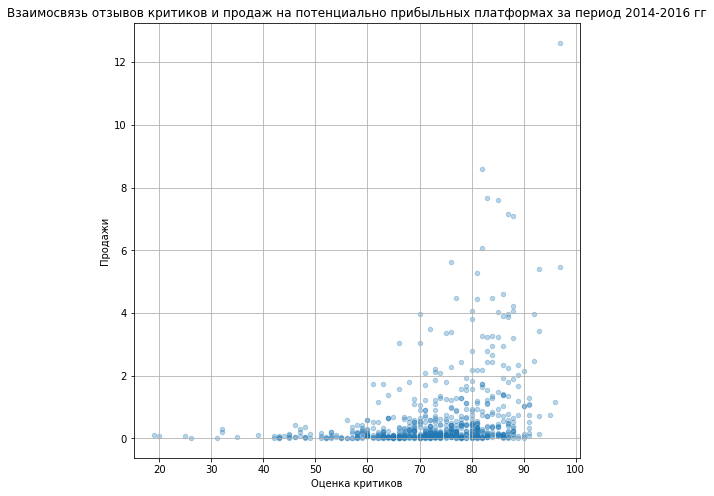

In [98]:
#построим диаграмму рассеяния по потенциально прибыльным платформам за период(2014-2016 гг) и оценке критиков, исключив значение -1
data_actual_profit_1.plot(
    kind='scatter',
    x='critic_score',
    y='all_sales',
    figsize=(8,8), 
    grid=True,
    alpha=0.3, 
    title='Взаимосвязь отзывов критиков и продаж на потенциально прибыльных платформах за период 2014-2016 гг'


)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [99]:
# посчитаем коэффициент корреляции между оценкой критиков по потенциально прибыльным платформам за период 2014-2016 гг и продажами
critic_corr_3 = data_actual_profit_1['critic_score'].corr(data_actual_profit_1['all_sales'])
print('Коэффициент корреляции между оценкой критиков по потенциально прибыльным платформам и продажами за период 2014-2016 гг составляет:',critic_corr_3)

Коэффициент корреляции между оценкой критиков по потенциально прибыльным платформам и продажами за период 2014-2016 гг составляет: 0.3272705661300674


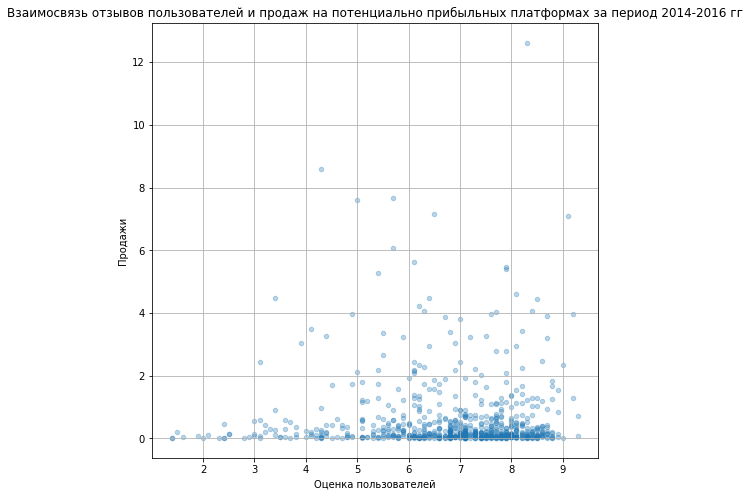

In [100]:
#построим диаграмму рассеяния по потенциально прибыльным платформам за период(2014-2016 гг) и оценке пользователей, исключив значение -1
data_actual_profit_2.plot(
    kind='scatter',
    x='user_score',
    y='all_sales',
    figsize=(8,8), 
    grid=True,
    alpha=0.3, 
    title='Взаимосвязь отзывов пользователей и продаж на потенциально прибыльных платформах за период 2014-2016 гг'


)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

In [101]:
# посчитаем коэффициент корреляции между оценкой пользователей по потенциально прибыльным платформам за период 2014-2016 гг и продажами
user_corr_4 = data_actual_profit_2['user_score'].corr(data_actual_profit_2['all_sales'])
print('Коэффициент корреляции между оценкой пользователей по потенциально прибыльным платформам за период 2014-2016 гг и продажами составляет:',user_corr_4)

Коэффициент корреляции между оценкой пользователей по потенциально прибыльным платформам за период 2014-2016 гг и продажами составляет: -0.003197872211426589


Коэффициент корреляции между оценкой критиков по потенциально прибыльным платформам и продажами за период 2014-2016 гг составляет: 0.3272705661300674. Оценка критиков влияет на продажи, но влияние слабое.
Коэффициент корреляции между оценкой пользователей по потенциально прибыльным платформам за период 2014-2016 гг и продажами составляет: -0.003197872211426589. Оценка пользователей отрицательная, но влияние настолько слабое, что практически не ощутимо.


#### Посмотрите на общее распределение игр по жанрам <a id='shag_3_9'></a>
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Рассмотрим распределение игр по жанрам по всем платформам за все года**

In [102]:
# посмотрим на медианные продажи по всем платформам за все года по жанрам
data.groupby('genre',as_index=False)['all_sales'].median().sort_values(by='all_sales',ascending=False)

,genre,all_sales
4,Platform,0.27
8,Shooter,0.24
10,Sports,0.22
2,Fighting,0.21
0,Action,0.19
6,Racing,0.19
7,Role-Playing,0.18
3,Misc,0.16
9,Simulation,0.15
5,Puzzle,0.10


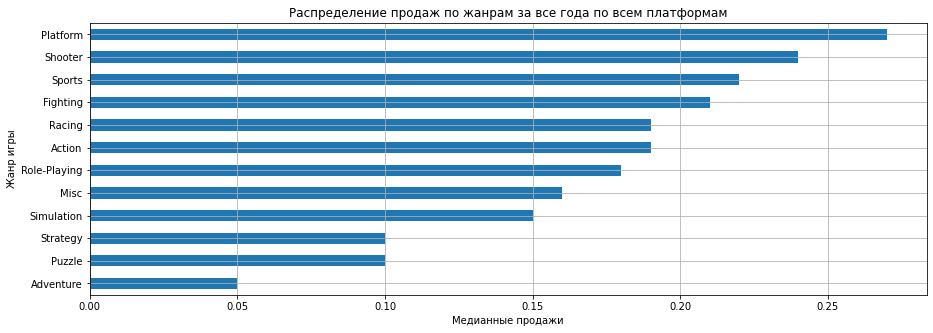

In [103]:
#построим график распределения продаж по всем платформам по жанрам за все года
data.groupby('genre',as_index=False)['all_sales'].median().sort_values(by='all_sales',ascending=True).plot(
    kind='barh',
    x='genre',
    figsize = (15,5),
    grid=True,
    legend=False,
    title='Распределение продаж по жанрам за все года по всем платформам',



)
plt.ylabel('Жанр игры')
plt.xlabel('Медианные продажи')
plt.show()


Медианное распределение по жанрам за все года по всем платформам выглядит следующим образом: самые популярные жанры, по котором больше всего продаж - это Platform, Shooter, Sports; самые менее поппулярные жанры, по которым меньше всего продаж - это Adventure, Puzzle, Strategy. 

**Рассмотрим распределение игр по жанрам по потенциально прибыльным платформам за актуальный период**

In [104]:
# посмотрим на медианные продажи по потенциально прибыльным платформам за актуальные года по жанрам
data_actual_profit.groupby('genre',as_index=False)['all_sales'].median().sort_values(by='all_sales',ascending=False)

,genre,all_sales
8,Shooter,0.550
10,Sports,0.200
4,Platform,0.150
2,Fighting,0.125
7,Role-Playing,0.110
9,Simulation,0.100
3,Misc,0.090
6,Racing,0.090
0,Action,0.080
11,Strategy,0.055


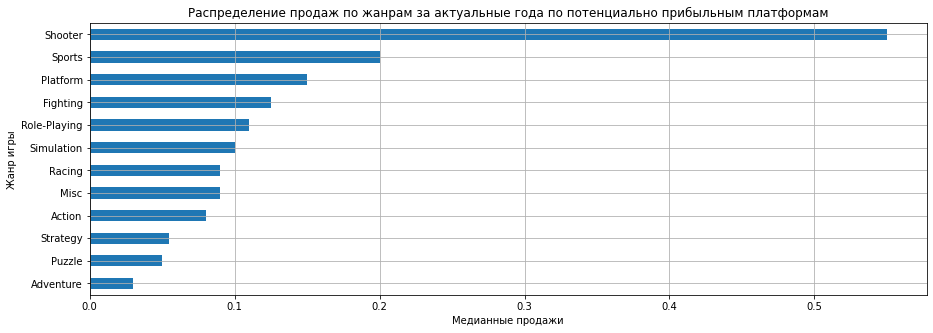

In [105]:
#построим график распределения продаж по потенциально прибыльным платформам по жанрам за актуальные года
data_actual_profit.groupby('genre',as_index=False)['all_sales'].median().sort_values(by='all_sales',ascending=True).plot(
    kind='barh',
    x='genre',
    figsize = (15,5),
    grid=True,
    legend=False,
    title='Распределение продаж по жанрам за актуальные года по потенциально прибыльным платформам',



)
plt.ylabel('Жанр игры')
plt.xlabel('Медианные продажи')
plt.show()


Медианное распределение по жанрам за актуальные года по потенциально прибыльным платформам выглядит следующим образом: самые популярные жанры, по котором больше всего продаж - это Shooter, Sports, Platform ; самые менее поппулярные жанры, по которым меньше всего продаж - это Adventure, Puzzle, Strategy. 

В настоящее время изменились пользовательские предпочтения, сейчас пользователи больше выбирают жанр Shooter, Role-Sports чем раньше и меньше жанр Platform. Что касается жанров с наименьшими продажами, то пользователи сейчас еще менее охотно выбирают жанр Puzzle, Strategy наобор в последнее время стали чуть более популярными.


**Вывод по шагу 3:**<a id='shag_3_conclusion'></a>

**1)** До 1994 года игр выходило совсем немного, предполагаю, что это связано с тем, что компьютеры, игровые приставки были не сильно распространены. Данные за все периоды важны с точки зрения рассмотрения динамики, по ним мы можем увидеть, что с 1980 года по 2001 год шло постепенное увеличение релиза игр, затем с 2001 года скачок и опять постепенный рост до 2006 года. С 2007 по 2010 год пик релиза игр. И с 2011 по настоящее время шел спад релиза игр. Т.к. создание игры и ее выход занимают определенное время, предполагаю, что спад с 2011 года был связан с экономической ситуацией с 2009 по 2013 года.

Однако, я считаю что для достижения поставленной задачи данные за все периоды не требуются, а именно данные до 2011 года. Т.к. до 2001 года технические возможности потребителей сильно отличаются от возможностей после. Компьютер и приставки стали более распространены, возможности для рекламы так же изменились. А с 2001 года до 2011 года включительно был рост и пик, последние года значения сильно ниже пиковых, поэтому рассматриваться стоит более актуальную информацию.

**2)** Выявлено, что за все имеющиеся года максимальные продажи во всех регионах были у платформы PS2, X360, PS3, Wii, DS, PS.
**3)** По графику "Распределение по платформам с наибольшими суммарными продажами за все года" видно, что: 
    * платформа PS появилась и продавалась с 1994 года по 2003 - 9 лет,
    * платформа PS2 появилась и продавалась с 2000 года по 2010 - 10 лет,
    * платформа DS появилась и продавалась с 2004 года по 2013 - 9 лет,
    * платформа X360 появилась и продавалась с 2005 года по 2015 - 10 лет,
    * платформа Wii появилась и продавалась с 2006 года по 2015 - 9 лет,
    * платформа PS3 появилась и продавалась с 2006 года по 2016 - 10 лет.    
Как видим платформы появляются и исчезают за 9-10 лет. При этом в промежутке с 2005 по 2013 год на рынке присутствовали от 3-х до 5-ти платформ. 
**4)** К 2016 году у нас 9 платформ, суммарные продажи по которым идут на спад. Актуальным периодом для построения прогноза на 2017 год будем считать период с 2014 года.

**5)** Общая динамика к 2016 году - это спад, однако стоит учесть, что в водных данных сейчас декабрь 2016 года, а значит суммарные продажи в декабре будут выше чем мы видим сейчас, т.к. рождественские и новогодние праздники приносят хорошие продажи.

**6)** 
- К **потенциально прибыльным платформам**, на мой взгляд, можно отнести **PS4, XOne, 3DS, WiiU, PC, PSV**:
  - Платформа PS4 появилась в 2013 году, продажи за 2014-2014 года составили - 39.5%.
  - Платформа XOne появилась в 2013 году, продажи за 2014-2014 года составили - 19.2%.
  - Платформа 3DS появилась в 2011 году, продажи за 2014-2014 года составили- 11.9%,
  - Платформа WiiU появилась в 2012 году, продажи за 2014-2016 года составили - 5.9%.
  - Платформа PC как мы видим на графике "Распределение по платформам с наибольшими суммарными продажами за все года и платформами актуальными на 2016 год" и на графике "Распределение платформ по годам с 2014 по 2016" дает +- стабильные продажи и с рынка уходить пока не планирует, продажи за 2014-2016 года составили 3.7 %.
  - Платформа PSV появилась в 2011 году, продажи за 2014-2016 года составили 3.1 %.
- К платформам **идущим на спад**, на мой взгляд можно отнести **PS3, X360, Wii, PSP**:
  - Платформа PS3 за 2014-2016 год принес хорошие суммарные продажи - 9.3%, однако как мы уже рассмотрели выше эта платформа появилась в 2006 году, в среднем платформа существует 9-10 лет, а значит в 2017 году велика вероятность, что продаж по данной платформе не будет или будет идти так же спад. Это же мы видим на графике "Распределение платформ по годам с 2014 по 2016" - спад.
  - Платформа X360 - за 2014-2016 год принесла хорошие суммарные продажи - 6.6%, однако платформа появилась в 2005 году, мощный пик по продажам у нее был в 2010 году, сейчас мы видим на графике "Распределение платформ по годам с 2014 по 2016"  у платформы идет спад. 
  - Платформа Wii за 2014-2016 год принесла хорошие суммарные продажи -  0.7%, появилась в 2006 году, пик пришелся на 2009 год, сейчас мы видим на графике "Распределение платформ по годам с 2014 по 2016"  у платформы идет спад. 
  - Платформа PSP очевидно уже ушла с рынка, в 2016 году продаж по ней нет.
  
  
**7)** По диаграмме размаха по глобальным продажам потенциально прибыльных платформ видно, что у каждой платформы есть игры, которые дали выбросы, где-то они редкие, где-то частые. Например на платформе 3DS и PS4 самые большие выбросы.  Однако мы не будем отбрасывать эти данные, потому что игра действительно могла быть настолько успешной. Там где частота выбросов выше - макисмальные продажи по платформе.
В целом межквартильный размах укладывается от 0.02 до 0.8, а максимальные значения "усов"не превышают 1.8.

**8)** Коэффициент корреляции между оценкой критиков и продажами составляет: 0.40266141068104083. Корреляция положительная, прямая зависимость - с увеличением оценки критиков увеличиваются продажи. Оценка критиков влияет на продажи, но влияние не сильное.
Коэффициент корреляции между оценкой пользователей и продажами составляет: -0.040131589472697356. Корреляция отрицательная, обратная зависимость - с увеличением оценки пользователей продажи падают. Оценка пользователей влияет на продажи, но влияние слабое.

**9)** На диаграмме размаха по продажам всех платформ без максимальных выбросов за весь период видно, что на некоторых платформах более однородные продажи, например XB, WS, NG, возможно это связано с тем, что на этих платформах выпускалось немного различных игр. Есть платформы, где однородных продаж не было, например GB, NES, GEN, возможно они выпускали много разных игр, которые продавались по-разному. Все платформы, приносящие максимальный доход, видны по количествам выбросов за пределами "усов".
**10)** Коэффициент корреляции между оценкой критиков по всем платформам и продажами за весь период составляет: 0.2453488454741138. Корреляция положительная, прямая зависимость - с увеличением оценки критиков увеличиваются продажи. Оценка критиков влияет на продажи, но влияние слабое.

Коэффициент корреляции между оценкой пользователей по всем платформам и продажами за весь период составляет: 0.08798399271321647. Корреляция положительная, прямая зависимость - с увеличением оценки пользователей увеличиваются продажи. Оценка критиков практически не влияет на продажи.
Как мы видим если рассматривать одну самую популярную платформу за актуальный период  и все платформы за все периоды , то влияние примерно такое же - слабое влияние оценки критиков на продажи и не значительное влияние оценки пользователей.

Коэффициент корреляции между оценкой критиков по потенциально прибыльным платформам и продажами за период 2014-2016 гг составляет: 0.3272705661300674. Оценка критиков влияет на продажи, но влияние слабое.
Коэффициент корреляции между оценкой пользователей по потенциально прибыльным платформам за период 2014-2016 гг и продажами составляет: -0.003197872211426589. Оценка пользователей отрицательная, но влияние настолько слабое, что практически не ощутимо.


**11)** Медианное распределение по жанрам за все года по всем платформам выглядит следующим образом: самые популярные жанры, по котором больше всего продаж - это Platform, Shooter, Sports; самые менее поппулярные жанры, по которым меньше всего продаж - это Adventure, Puzzle, Strategy.
Медианное распределение по жанрам за актуальные года по потенциально прибыльным платформам выглядит следующим образом: самые популярные жанры, по котором больше всего продаж - это Shooter, Sports, Platform ; самые менее поппулярные жанры, по которым меньше всего продаж - это Adventure, Puzzle, Strategy. 

В настоящее время изменились пользовательские предпочтения, сейчас пользователи больше выбирают жанр Shooter, Role-Sports чем раньше и меньше жанр Platform. Что касается жанров с наименьшими продажами, то пользователи сейчас еще менее охотно выбирают жанр Puzzle, Strategy наобор в последнее время стали чуть более популярными.


### Шаг 4. Составьте портрет пользователя каждого региона <a id='shag_4'></a>
Определите для пользователя каждого региона (NA, EU, JP):


#### Самые популярные платформы (топ-5) <a id='shag_4_1'></a>
Опишите различия в долях продаж.


Чтобы понять насколько сильная разница будет в показателях за весь период и за актуальный период рассмотрим на примере Северной Америки распределение топ 5 по популярности.


**Северная Америка за весь период**


In [106]:
#сгруппируем для Северной Америки общие суммы продаж по платформам, отсортируем по убыванию сумм и выведм топ 5
na_sales_top = data.groupby('platform')['na_sales'].sum()\
    .sort_values(ascending=False).head(5)
display(na_sales_top)


platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

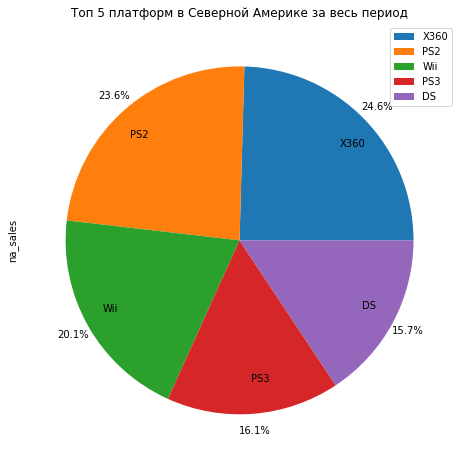

In [107]:
#построим круговой график по платформам и суммарным продажам в Северной Америке за весь период
na_sales_top.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Топ 5 платформ в Северной Америке за весь период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.8


)
plt.show()

В Северной Америке в топ-5 по популярности за весь период входят:
- X360 - доля составляет 24.6%
- PS2 - доля составляет 23.6%
- Wii - доля составляет20.1%
- PS3 - доля составляет 16.1%
- DS - доля составляет 15.7%

**Северная Америка за актуальный период 2014-2016 гг:**

In [108]:
#сгруппируем для Северной Америки общие суммы продаж по платформам, отсортируем по убыванию сумм и выведм топ 5
na_sales_top_actual = data_actual.groupby('platform')['na_sales'].sum()\
    .sort_values(ascending=False).head(5)
display(na_sales_top_actual)



platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

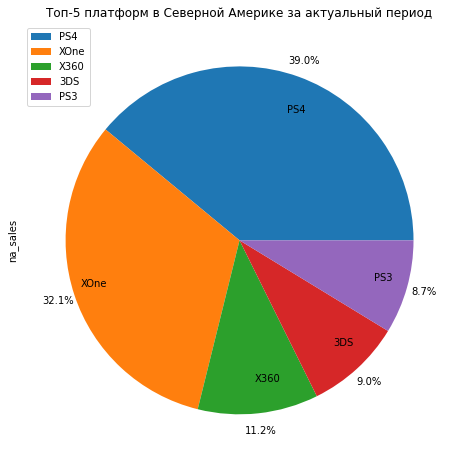

In [109]:
#построим круговой график по платформам и суммарным продажам в Северной Америке за актуальный период
na_sales_top_actual.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Топ-5 платформ в Северной Америке за актуальный период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.8


)
plt.show()

В Северной Америке в топ-5 по популярности за актуальный период входят:
- PS4 - доля составляет 39.0%
- XOne - доля составляет 32.1%
- X360 - доля составляет 11.2%
- 3DS - доля составляет 9.0%
- PS3 - доля составляет 8.7%

Распределение топ 5 платформ по популярности за актуальный период очень сильно отличается от распределения топ 5 платформ по популярности за весь период. X360 и PS3 остались в топ 5, но с разными долями. Таким образом мы подтверждаем, что развитие платформ - динамичный процесс.

**Европа за актуальный период 2014-2016 гг**

In [110]:
#сгруппируем для Европы общие суммы продаж по платформам, отсортируем по убыванию сумм и выведм топ 5
eu_sales_top_actual = data_actual.groupby('platform')['eu_sales'].sum()\
    .sort_values(ascending=False).head(5)
display(eu_sales_top_actual)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

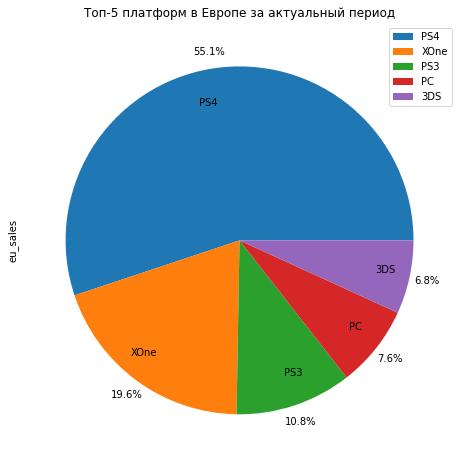

In [111]:
#построим круговой график по платформам и суммарным продажам в Европе за актуальный период
eu_sales_top_actual.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Топ-5 платформ в Европе за актуальный период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.8


)
plt.show()

В Европе в топ-5 по популярности за актуальный период входят:
- PS4 - доля составляет  55.1%
- XOne - доля составляет 19.6% 
- PS3 - доля составляет 10.8% 
- PC - доля составляет 7.6% 
- 3DS - доля составляет 6.8%


**Япония за актуальный период 2014-2016 гг**

In [112]:
#сгруппируем для Японии общие суммы продаж по платформам, отсортируем по убыванию сумм и выведем топ 5
jp_sales_top_actual = data_actual.groupby('platform')['jp_sales'].sum()\
    .sort_values(ascending=False).head(5)
display(jp_sales_top_actual)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

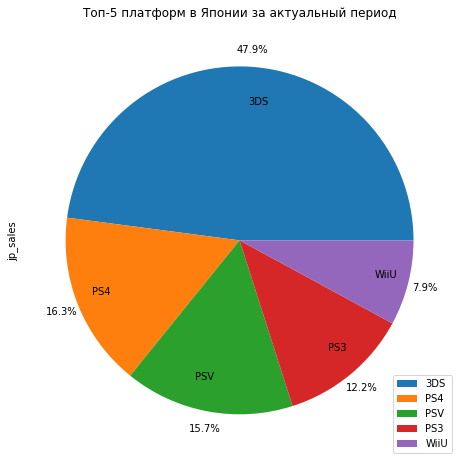

In [113]:
#построим круговой график по платформам и суммарным продажам в Японии за актуальный период
jp_sales_top_actual.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Топ-5 платформ в Японии за актуальный период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.8


)
plt.show()

В Японии в топ-5 по популярности за актуальный период входят:
- 3DS - доля составляет  47.9%
- PS4 - доля составляет 16.3% 
- PSV - доля составляет 15.7% 
- PS3 - доля составляет 12.2% 
- WiiU - доля составляет 7.9%

**Посмотрим общее распределение по популярности в Северной Америке, Европе и Японии за весь период по всем платформам**

In [114]:
#сделаем сводную таблицу для всего периода по платформам 
data.pivot_table(columns='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
eu_sales,4.86,0.0,61.27,1.69,188.41,47.51,74.59,38.32,5.52,0.00,41.03,21.15,0.00,140.37,0.00,212.39,332.63,327.21,141.09,65.62,13.07,0.54,0.36,19.04,0.00,0.00,258.32,25.13,268.32,59.65,51.59
jp_sales,0.00,0.1,100.62,8.56,175.02,85.12,46.56,21.34,2.67,0.04,33.76,98.65,1.44,0.17,0.03,139.78,137.54,79.41,15.96,75.88,21.84,32.26,0.45,116.55,0.16,1.42,68.28,13.01,12.30,1.38,0.34
na_sales,80.78,0.0,82.65,5.43,380.31,113.64,184.12,131.94,19.27,0.00,138.91,125.94,0.00,93.34,0.00,334.72,572.92,390.13,108.74,107.27,12.47,0.72,1.00,61.23,0.00,0.00,486.87,38.10,595.74,182.06,93.12


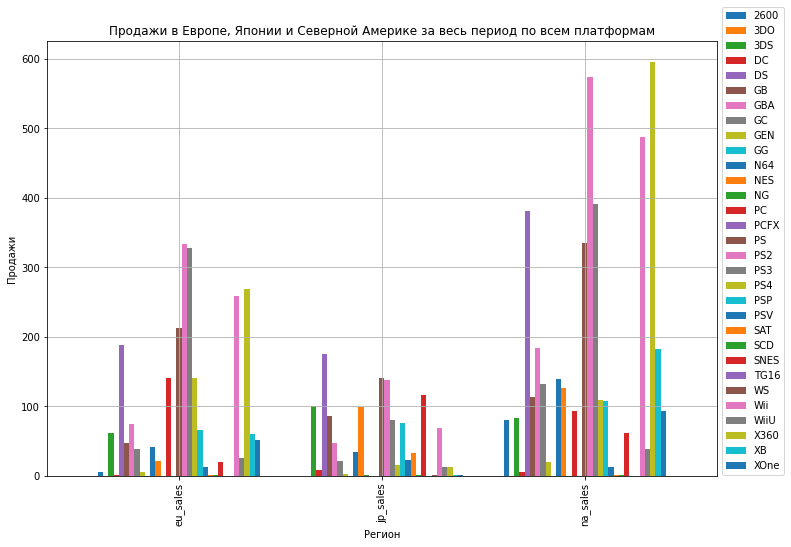

In [115]:
#построим столбчатый график для всех регионов по всем платформам за весь период
data.pivot_table(columns='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(
    kind='bar',
    figsize=(12,8),
    title='Продажи в Европе, Японии и Северной Америке за весь период по всем платформам',
    grid=True,
    width=0.8

    
)
plt.xlabel('Регион')
plt.ylabel('Продажи')
plt.legend(bbox_to_anchor=(1, 1.09))
plt.show()

На столбчатом графике продаж в Европе, Японии и Северной Америке за весь период по всем платформам видно, что максимальные продажи были в Северной Америке, пользователи Японии более сдержаны в покупке игр.

**Посмотрим общее распределение по популярности платформ в Северной Америке, Европе и Японии за актуальный период по всем платформам**

In [116]:
#сделаем сводную таблицу для актуального периода по платформам 
data_actual.pivot_table(columns='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
eu_sales,16.12,17.97,25.54,130.04,0.00,3.53,2.59,13.15,15.49,46.25
jp_sales,44.24,0.00,11.22,15.02,0.36,14.54,0.00,7.31,0.08,0.32
na_sales,22.64,7.23,22.05,98.61,0.00,2.52,2.08,19.36,28.30,81.27


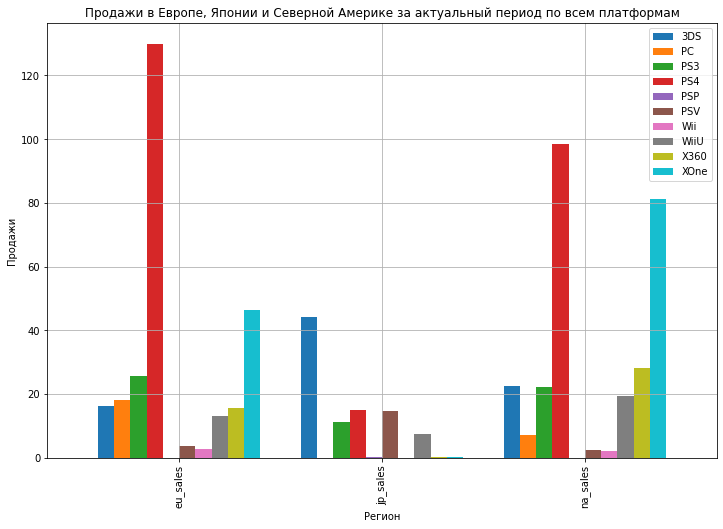

In [117]:
#построим столбчатый график для всех регионов за актуальный период
data_actual.pivot_table(columns='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(
    kind='bar',
    figsize=(12,8),
    title='Продажи в Европе, Японии и Северной Америке за актуальный период по всем платформам',
    grid=True,
    width=0.8

    
)
plt.xlabel('Регион')
plt.ylabel('Продажи')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

На общем графике продаж в Европе, Японии и Северной Америке за актуальный период по всем платформам видно, что в распределении популярности в Северной Америке и Европе лидируют PS4 и XOne. Между PS3 и 3DS уже есть отличия в распределении. Можно отметить, что в Северной Америке больше выбирают платформу X360 чем в Европе. При этом в Европе больше выбирают PC чем в Северной Америке. 
При сравнении с распределением популярности в Японии видно, что не смотря на отличия между распределением в Северной Америке и Европе можно сказать, что они похожи. 
Популярность в Японии отличается от Северной Америки и Европы - там были два преоблажающих лидера, в Японии же один лидер - 3DS, а остальное распределение популярности более однородное.

#### Самые популярные жанры (топ-5) <a id='shag_4_1'></a>
Поясните разницу.

**Северная Америка за актуальный период**


In [118]:
#сгруппируем для Северной Америки общие суммы продаж по жанрам, отсортируем по убыванию сумм и выведм топ 5
na_genre_top_actual = data_actual.groupby('genre')['na_sales'].sum()\
    .sort_values(ascending=False).head(5)
display(na_genre_top_actual)

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

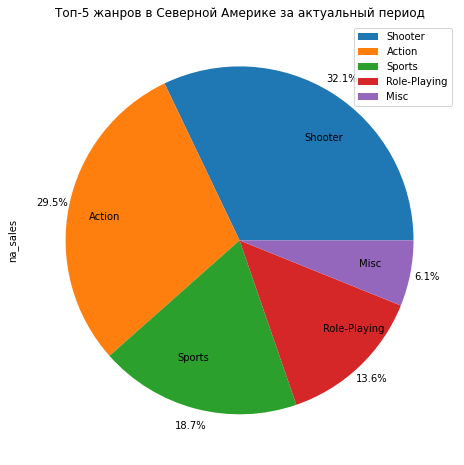

In [119]:
#построим круговой график по жанрам и суммарным продажам в Северной Америке за актуальный период
na_genre_top_actual.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Топ-5 жанров в Северной Америке за актуальный период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.7


)
plt.show()

В Северной Америке в топ-5 по популярности жанров за актуальный период входят:  
  - Shooter доля составляет - 32.1%
  - Action доля составляет - 29.5%
  - Sports доля составляет - 18.7%
  - Role-Playing доля составляет 13.6%
  - Misc доля составляет 6.1%

**Европа за актуальный период**


In [120]:
#сгруппируем для Европы общие суммы продаж по платформам, отсортируем по убыванию сумм и выведем топ 5
eu_genre_top_actual = data_actual.groupby('genre')['eu_sales'].sum()\
    .sort_values(ascending=False).head(5)
display(eu_genre_top_actual)

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

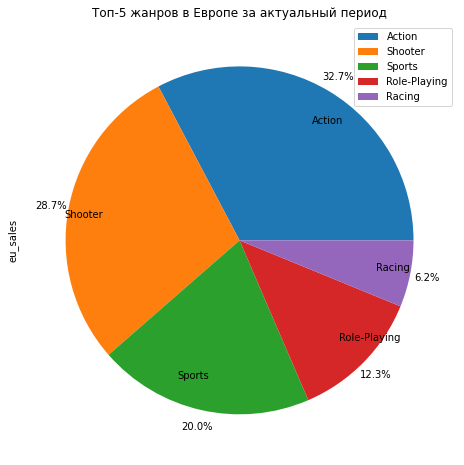

In [121]:
#построим круговой график по жанрам и суммарным продажам в Европе за актуальный период
eu_genre_top_actual.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Топ-5 жанров в Европе за актуальный период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.8


)
plt.show()

В Европе в топ-5 по популярности жанров за актуальный период входят:  
   - Action доля составляет - 32.7%
   - Shooter доля составляет - 28.7%
   - Sports доля составляет - 20.0%
   - Role-Playing доля составляет 12.3%
   - Racing доля составляет 6.2%

**Япония за актуальный период**


In [122]:
#сгруппируем для Японии общие суммы продаж по платформам, отсортируем по убыванию сумм и выведем топ 5
jp_genre_top_actual = data_actual.groupby('genre')['jp_sales'].sum()\
    .sort_values(ascending=False).head(5)
display(jp_genre_top_actual)

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

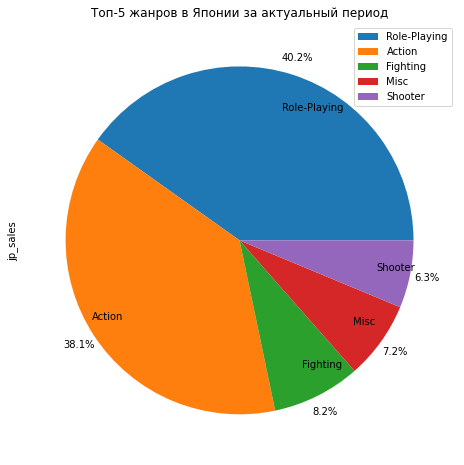

In [123]:
#построим круговой график по жанрам и суммарным продажам в Японии за актуальный период
jp_genre_top_actual.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Топ-5 жанров в Японии за актуальный период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.8


)
plt.show()

В Японии в топ-5 по популярности жанров за актуальный период входят:  
   - Role-Playing доля составляет - 40.2%
   - Action доля составляет - 38.1%
   - Fighting доля составляет - 8.2%
   - Misc доля составляет 7.2%
   - Shooter доля составляет 6.3%

**Посмотрим общее распределение по популярности жанров в Северной Америке, Европе и Японии за актуальный период по всем платформам**

In [124]:
#сделаем сводную таблицу для актуального периода по жанрам 
data_actual.pivot_table(columns='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
eu_sales,74.68,6.49,6.69,12.86,6.80,0.52,14.13,28.17,65.52,7.30,45.73,1.79
jp_sales,29.58,3.60,6.37,5.61,2.69,0.93,1.76,31.16,4.87,2.31,3.26,0.95
na_sales,72.53,5.64,12.43,15.05,6.79,0.65,8.74,33.47,79.02,2.63,46.13,0.98


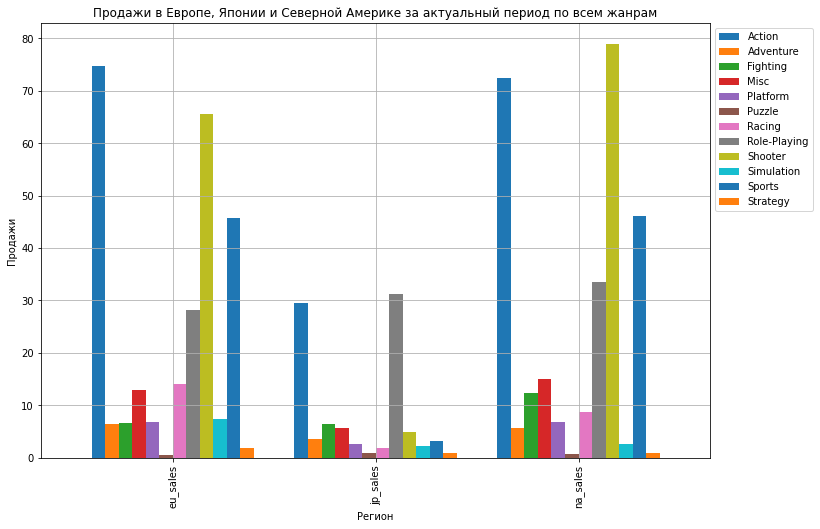

In [125]:
#построим столбчатый график для всех регионов за актуальный период
data_actual.pivot_table(columns='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(
    kind='bar',
    figsize=(12,8),
    title='Продажи в Европе, Японии и Северной Америке за актуальный период по всем жанрам',
    grid=True,
    width=0.8

    
)
plt.xlabel('Регион')
plt.ylabel('Продажи')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

На общем графике продаж в Европе, Японии и Северной Америке за актуальный период по всем жанрам видно, что в распределении популярности в Северной Америке и Европе лидируют Shooter, Action, Sports и Role-Playing. Однако пользователи Северной Америки предпочитают больше  Misc (доля составляет 6.1%), а пользователи Европы жанр - Racing(доля составляет 6.2%).
Распределение продаж по жанрам Японии сильно отличается от распределения в Северной Америке и Европе, там наиболее популярны Role-Playing (доля составляет 32.7%), Fighting (доля составляет 8.2%), а Shooter можно отнести к наименее популярному жанру (доля составляет 6.3%). 


#### Влияет ли рейтинг ESRB на продажи в отдельном регионе? <a id='shag_4_3'></a>


In [126]:
data_actual['rating'].unique()

array(['отсутствует', 'M', 'E', 'T', 'E10+'], dtype=object)

Найдем в интернете расшифровку имеющегося рейтинга:

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».<p>
«T» («Teen») — «Подросткам». Игра подходит для лиц от 13 лет.<p>
«E» («Everyone») — «Для всех».Содержание вполне подходит для всех возрастов.<p>
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.<p>

**Северная Америка за актуальный период**

In [127]:
#сгруппируем для Северной Америки общие суммы продаж по рейтингу, отсортируем по убыванию сумм
na_rating_actual = data_actual.groupby('rating')['na_sales'].sum()\
    .sort_values(ascending=False)
display(na_rating_actual)

rating
M              96.42
отсутствует    64.72
E              50.74
T              38.95
E10+           33.23
Name: na_sales, dtype: float64

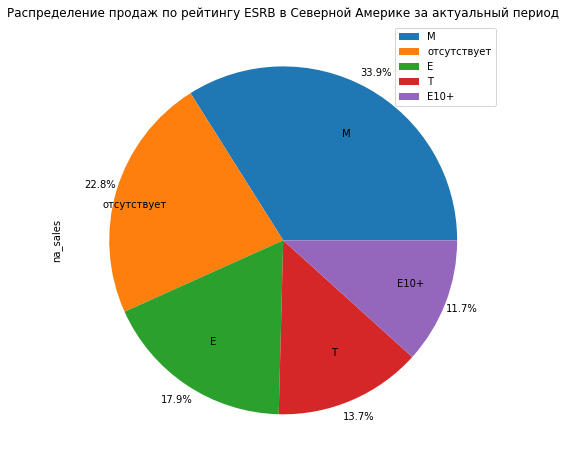

In [128]:
#построим круговой график по рейтингу и суммарным продажам в Северной Америке за актуальный период
na_rating_actual.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Распределение продаж по рейтингу ESRB в Северной Америке за актуальный период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.7


)
plt.show()

В Северной Америке по распределению рейтинга ESRB за актуальный период:  
  - М доля составляет - 33.9%
  - Отсутствует доля составляет - 22.8%
  - Е доля составляет - 17.9%
  - Т доля составляет - 13.7%
  - Е10+ доля составляет - 11.7%

**Европа за актуальный период**

In [129]:
#сгруппируем для Европы общие суммы продаж по рейтингу, отсортируем по убыванию сумм
eu_rating_actual = data_actual.groupby('rating')['eu_sales'].sum()\
    .sort_values(ascending=False)
display(eu_rating_actual)

rating
M              93.44
отсутствует    58.95
E              58.06
T              34.07
E10+           26.16
Name: eu_sales, dtype: float64

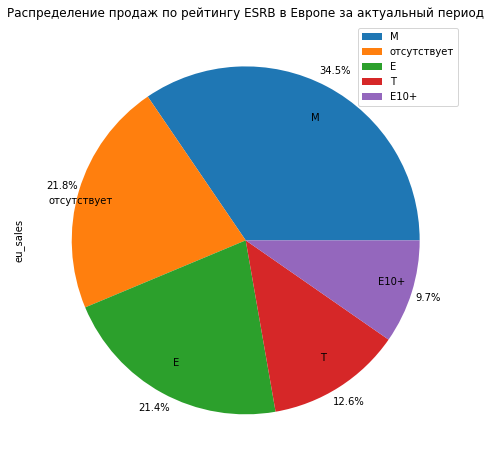

In [130]:
#построим круговой график по рейтингу и суммарным продажам в Европе за актуальный период
eu_rating_actual.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Распределение продаж по рейтингу ESRB в Европе за актуальный период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.8


)
plt.show()

В Европе по распределению рейтинга ESRB за актуальный период:  
  - М доля составляет - 34.5%
  - Отсутствует доля составляет - 21.8%
  - Е доля составляет - 21.4%
  - Т доля составляет - 12.6%
  - Е10+ доля составляет - 9.7%

**Япония за актуальный период**


In [131]:
#сгруппируем для Японии общие суммы продаж по рейтингу, отсортируем по убыванию сумм
jp_rating_actual = data_actual.groupby('rating')['jp_sales'].sum()\
    .sort_values(ascending=False)
display(jp_rating_actual)

rating
отсутствует    56.90
T              14.78
E               8.94
M               8.01
E10+            4.46
Name: jp_sales, dtype: float64

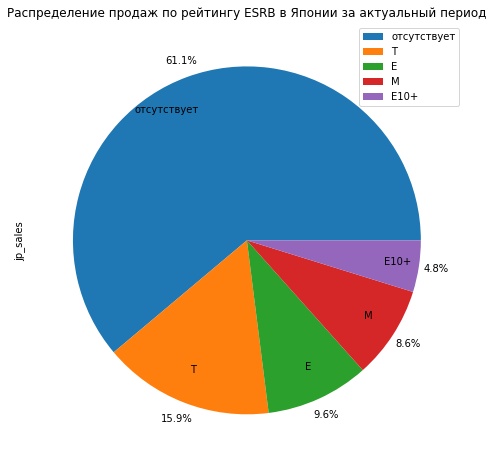

In [132]:
#построим круговой график по рейтингу и суммарным продажам в Японии за актуальный период
jp_rating_actual.plot(
    kind='pie',
    figsize = (8,8),
    legend=True,
    title='Распределение продаж по рейтингу ESRB в Японии за актуальный период',
    autopct='%.1f%%',
    pctdistance=1.1, 
    labeldistance=0.8


)
plt.show()

В Японии по распределению рейтинга ESRB за актуальный период:  
  - Отсутствует доля составляет - 61.1%
  - Т доля составляет - 15.9%
  - Е доля составляет - 9.6%
  - М доля составляет - 8.6%
  - Е10+ доля составляет - 4.8%

**Посмотрим общее распределение рейтинга ESRB в Северной Америке, Европе и Японии за актуальный период**

In [133]:
#сделаем сводную таблицу для актуального периода по рейтингу 
data_actual.pivot_table(columns='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')

rating,E,E10+,M,T,отсутствует
eu_sales,58.06,26.16,93.44,34.07,58.95
jp_sales,8.94,4.46,8.01,14.78,56.90
na_sales,50.74,33.23,96.42,38.95,64.72


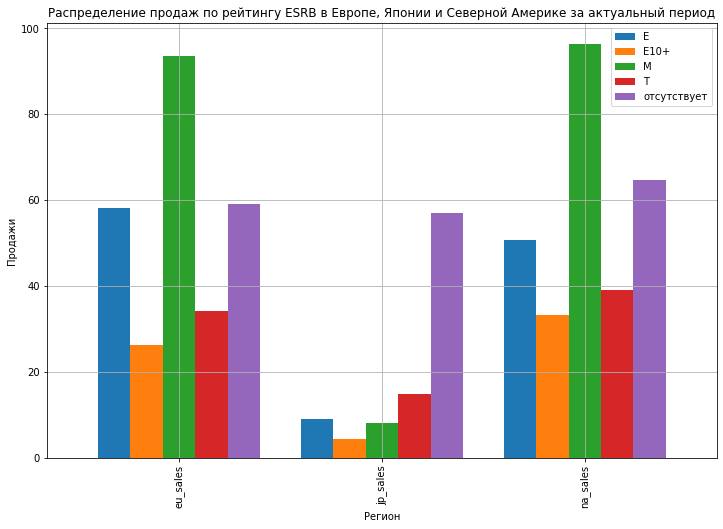

In [134]:
#построим столбчатый график для всех регионов за актуальный период
data_actual.pivot_table(columns='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum').plot(
    kind='bar',
    figsize=(12,8),
    title='Распределение продаж по рейтингу ESRB в Европе, Японии и Северной Америке за актуальный период',
    grid=True,
    width=0.8

    
)
plt.xlabel('Регион')
plt.ylabel('Продажи')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Как видно по общему распределению продаж по рейтингу ESRB в Европе, Японии и Северной Америке за актуальный период, распределение в Северной Америке и Европе очень похоже: лидирует рейтинг М (Для взрослых), его доли составляют 33.9% и 34.5% соответственно, Е (для всех), его доли составляют 17.9% и 21.4% соответственно. Отсутствующий рейтинг не рассматриваем.
Распределение рейтинга в Японии значительно отличается от рейтинга Северной Америки и Европы, там лидирует рейтинг Т (Подросткам), его доля составляет 15.9%.



**Выводы по шагу 4:**<a id='shag_4_conclusion'></a>
1) В Северной Америке в топ-5 по популярности платформы за актуальный период входят:  
   - PS4 - доля составляет 39.0%
   - XOne - доля составляет 32.1%
   - X360 - доля составляет 11.2%
   - 3DS - доля составляет 9.0%
   - PS3 - доля составляет 8.7%

Распределение топ 5 платформ по популярности за актуальный период очень сильно отличается от распределения топ 5 платформ по популярности за весь период. X360 и PS3 остались в топ 5, но с разными долями. Таким образом мы подтверждаем, что развитие платформ - динамичный процесс.

В Европе в топ-5 по популярности  платформы за актуальный период входят:
   - PS4 - доля составляет 55.1%
   - XOne - доля составляет 19.6%
   - PS3 - доля составляет 10.8%
   - PC - доля составляет 7.6%
   - 3DS - доля составляет 6.8%

В Японии в топ-5 по популярности  платформы за актуальный период входят:
   - 3DS - доля составляет 47.9%
   - PS4 - доля составляет 16.3%
   - PSV - доля составляет 15.7%
   - PS3 - доля составляет 12.2%
   - WiiU - доля составляет 7.9%

2) На столбчатом графике продаж в Европе, Японии и Северной Америке за весь период по всем платформам видно, что максимальные продажи были в Северной Америке, пользователи Японии более сдержаны в покупке игр.


3) На общем графике продаж в Европе, Японии и Северной Америке за актуальный период по всем платформам видно, что в распределении популярности в Северной Америке и Европе лидируют PS4 и XOne. Между PS3 и 3DS уже есть отличия в распределении. Можно отметить, что в Северной Америке больше выбирают платформу X360 чем в Европе. При этом в Европе больше выбирают PC чем в Северной Америке. 

При сравнении с распределением популярности в Японии видно, что не смотря на отличия между распределением в Северной Америке и Европе можно сказать, что они похожи. 
Популярность в Японии отличается от Северной Америки и Европы - там были два преоблажающих лидера, в Японии же один лидер - 3DS, а остальное распределение популярности более однородное.


4) В Северной Америке в топ-5 по популярности жанров за актуальный период входят:  
  - Shooter доля составляет - 32.1%
  - Action доля составляет - 29.5%
  - Sports доля составляет - 18.7%
  - Role-Playing доля составляет - 13.6%
  - Misc доля составляет - 6.1%
  
В Европе в топ-5 по популярности жанров за актуальный период входят:  
   - Action доля составляет - 32.7%
   - Shooter доля составляет - 28.7%
   - Sports доля составляет - 20.0%
   - Role-Playing доля составляет - 12.3%
   - Racing доля составляет - 6.2%
   
В Японии в топ-5 по популярности жанров за актуальный период входят:  
   - Role-Playing доля составляет - 40.2%
   - Action доля составляет - 38.1%
   - Fighting доля составляет - 8.2%
   - Misc доля составляет 7.2%
   - Shooter доля составляет 6.3%
5) На общем графике продаж в Европе, Японии и Северной Америке за актуальный период по всем жанрам видно, что в распределении популярности в Северной Америке и Европе лидируют Shooter, Action, Sports и Role-Playing. Однако пользователи Северной Америки предпочитают больше  Misc (доля составляет 6.1%), а пользователи Европы жанр - Racing(доля составляет 6.2%).

Распределение продаж по жанрам Японии сильно отличается от распределения в Северной Америке и Европе, там наиболее популярны Role-Playing (доля составляет 32.7%), Fighting (доля составляет 8.2%), а Shooter можно отнести к наименее популярному жанру (доля составляет 6.3%). 

Предполагаю, что в Японии настолько популярны игры жанра Role-Playing потому что игровые персонажи там могут быть персонажами аниме, что достаточно популярно в их культуре. В Северной Америке и Европе - Shooter и Action популярны потому что игры относящиеся к типу стрелялки соответствуют западной массовой культуре.

6) В Северной Америке по распределению рейтинга ESRB за актуальный период:  
  - М доля составляет - 33.9%
  - Отсутствует доля составляет - 22.8%
  - Е доля составляет - 17.9%
  - Т доля составляет - 13.7%
  - Е10+ доля составляет - 11.7%
  
В Европе по распределению рейтинга ESRB за актуальный период:  
  - М доля составляет - 34.5%
  - Отсутствует доля составляет - 21.8%
  - Е доля составляет - 21.4%
  - Т доля составляет - 12.6%
  - Е10+ доля составляет - 9.7%

В Японии по распределению рейтинга ESRB за актуальный период:  
  - Отсутствует доля составляет - 61.1%
  - Т доля составляет - 15.9%
  - Е доля составляет - 9.6%
  - М доля составляет - 8.6%
  - Е10+ доля составляет - 4.8%
  
7) Как видно по общему распределению продаж по рейтингу ESRB в Европе, Японии и Северной Америке за актуальный период, распределение в Северной Америке и Европе очень похоже: лидирует рейтинг М (Для взрослых), его доли составляют 33.9% и 34.5% соответственно, Е (для всех), его доли составляют 17.9% и 21.4% соответственно. Отсутствующий рейтинг не рассматриваем.
Распределение рейтинга в Японии значительно отличается от рейтинга Северной Америки и Европы, там лидирует рейтинг Т (Подросткам), его доля составляет 15.9%.

8) По рассматренным распределениям популярности платформ, жанров и рейтинга ESRB получаем следующий портрет пользователя каждого региона:
 - *Северная Америка*. Пользователи выбирают платформу PS4 и XOne, жанр Shooter и Action и этому всему соответствует рейтинг М (для взрослых).
 - *Европа*. Пользователи выбирают платформу PS4, жанр Action и Shooter и этому всему соответствует рейтинг М (для взрослых).
 - *Япония*. Пользователи выбирают платформу 3DS, жанр Role-Playing и Action и этому всему соответствует рейтинг Т(подросткам).
 


### Шаг 5. Проверьте гипотезы <a id='shag_5'></a>
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<a id='shag_5_1'></a>


Сформулируем нулевую гипотезу - средний пользовательский рейтинг платформы платформ Xbox One равен среднему пользовательскому рейтингу платформы PC.

Альтернативная гипотеза - средний пользовательский рейтинг платформы платформ Xbox One не равен среднему пользовательскому рейтингу платформы PC.

Уроверь статистической значимости alpha возьмем 0.05

In [135]:
# создадим датафрейм по оценке пользователей (с исключенным значением -1) в котором будет только платформа Xbox One
xbox_one_platform_user = data[(data['platform']=='XOne')  & (data['user_score']!=-1) ]

In [136]:
# создадим датафрейм  по оценке пользователей (с исключенным значением -1) в котором будет только платформа PC
pc_platform_user = data[(data['platform']=='PC')  & (data['user_score']!=-1) ]

In [137]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, то отвергнем нулевую гипотезу

In [138]:
results = st.ttest_ind(xbox_one_platform_user['user_score'] ,pc_platform_user['user_score'] ,equal_var=False) 
#сохраним в переменную результат метода для проверки гипотезы
#т.к.у выборки разного размера используем параметр equal_var=False

print(results)

p_value = results.pvalue #найдем значение p-value
print('p-value равно:', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Ttest_indResult(statistic=-4.671113961085972, pvalue=4.5385802963771835e-06)
p-value равно: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


Вероятность случайно получить такую разницу меньше выбранного уровня значимости. Очень маленькое p-value (0.0000045385802963771835) говорит нам о том, вероятность случайного совпадения средних значений совокупностей выборок очень мала. Нулевая гипотеза отвергается в пользу альтернативной гипотезы.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные<a id='shag_5_2'></a>



Сформулируем нулевую гипотезу - средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

Альтернативная гипотеза - средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports.

Уроверь статистической значимости alpha возьмем 0.05

In [139]:
# создадим датафрейм по оценке пользователей (с исключенным значением -1) в котором будет только жанр Action
action_genre_user = data[(data['genre']=='Action')  & (data['user_score']!=-1) ]

In [140]:
# создадим датафрейм по оценке пользователей (с исключенным значением -1) в котором будет только жанр Sports
sports_genre_user = data[(data['genre']=='Sports')  & (data['user_score']!=-1) ]

In [141]:
results_genre = st.ttest_ind(action_genre_user['user_score'] ,sports_genre_user['user_score'], alternative='greater') 
#сохраним в переменную результат метода для проверки гипотезы
#т.к.у выборки разного размера используем параметр equal_var=False

print(results_genre)

p_value = results_genre.pvalue #найдем значение p-value
print('p-value равно:', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Ttest_indResult(statistic=1.8472797735322193, pvalue=0.032404640322102635)
p-value равно: 0.032404640322102635
Отвергаем нулевую гипотезу


Вероятность при верной нулевой гипотезе получить значение статистики или более удалённое от того составляет 0.032404640322102635 (примерно 3,24%). Нулевая гипотеза отвергается в сторону альтернативной. Однако значение p-value у нас получилось такое, что при изменении уровня статистической значимости в меньшую сторону, наша нулевая гипотеза уже не будет отвергаться. Стоит учесть при значениях, для которых гипотезы не сформулированы - средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports, нулевая гипотеза так же отвергается.


**Вывод по шагу 5:**<a id='shag_5_conclusion'></a>

1) Нулевая гипотеза сформулирована по принципу равенства. Альтернативная гипотеза сформулирована по принципу не равенства, возможно отклонение и в большую, и в меньшую стороны.

Для проверки гипотезы применили t-тест, а именно метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам потому что мы сравниваем средние значения.

Вероятность случайно получить такую разницу меньше выбранного уровня значимости. Очень маленькое p-value (0.0000045385802963771835) говорит нам о том, вероятность случайного совпадения средних значений совокупностей выборок очень мала. Нулевая гипотеза (средний пользовательский рейтинг платформы платформ Xbox One равен среднему пользовательскому рейтингу платформы PC) отвергается в пользу альтернативной гипотезы (средний пользовательский рейтинг платформы платформ Xbox One не равен среднему пользовательскому рейтингу платформы PC).

2) Нулевая гипотеза сформулирована по принципу равенства.  Альтернативная гипотеза сформулирована по принципу не равенства, где возможно отклонение в большую сторону.

Для проверки гипотезы применили t-тест, а именно метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам потому что мы сравниваем средние значения.

Вероятность при верной нулевой гипотезе (средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports) получить значение статистики или более удалённое от того составляет 0.032404640322102635 (примерно 3,24%). Нулевая гипотеза отвергается в сторону альтернативной (средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports). Однако значение p-value у нас получилось такое, что при изменении уровня статистической значимости в меньшую сторону, наша нулевая гипотеза уже не будет отвергаться. Стоит учесть при значениях, для которых гипотезы не сформулированы - средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports, нулевая гипотеза так же отвергается.

### Шаг 6. Напишите общий вывод <a id='shag_6'></a>

1) До 1994 года игр выходило совсем немного, предполагаю, что это связано с тем, что компьютеры, игровые приставки были не сильно распространены. Данные за все периоды важны с точки зрения рассмотрения динамики, по ним мы можем увидеть, что с 1980 года по 2001 год шло постепенное увеличение релиза игр, затем с 2001 года скачок и опять постепенный рост до 2006 года. С 2007 по 2010 год пик релиза игр. И с 2011 по настоящее время шел спад релиза игр. Т.к. создание игры и ее выход занимают определенное время, предполагаю, что спад с 2011 года был связан с экономической ситуацией с 2009 по 2013 года.

Однако, я считаю что для достижения поставленной задачи данные за все периоды не требуются, а именно данные до 2011 года. Т.к. до 2001 года технические возможности потребителей сильно отличаются от возможностей после. Компьютер и приставки стали более распространены, возможности для рекламы так же изменились. А с 2001 года до 2011 года включительно был рост и пик, последние года значения сильно ниже пиковых, поэтому рассматриваться стоит более актуальную информацию.

2) Выявлено, что за все имеющиеся года максимальные продажи во всех регионах были у платформы PS2, X360, PS3, Wii, DS, PS. 3) По графику "Распределение по платформам с наибольшими суммарными продажами за все года" видно, что: 
* платформа PS появилась и продавалась с 1994 года по 2003 - 9 лет, 
* платформа PS2 появилась и продавалась с 2000 года по 2010 - 10 лет, 
* платформа DS появилась и продавалась с 2004 года по 2013 - 9 лет, 
* платформа X360 появилась и продавалась с 2005 года по 2015 - 10 лет, 
* платформа Wii появилась и продавалась с 2006 года по 2015 - 9 лет, 
* платформа PS3 появилась и продавалась с 2006 года по 2016 - 10 лет.

Как видим платформы появляются и исчезают за 9-10 лет. При этом в промежутке с 2005 по 2013 год на рынке присутствовали от 3-х до 5-ти платформ. 

4) К 2016 году у нас 9 платформ, суммарные продажи по которым идут на спад. Актуальным периодом для построения прогноза на 2017 год будем считать период с 2014 года.

5) Общая динамика к 2016 году - это спад, однако стоит учесть, что в водных данных сейчас декабрь 2016 года, а значит суммарные продажи в декабре будут выше чем мы видим сейчас, т.к. рождественские и новогодние праздники приносят хорошие продажи.

6) К **потенциально прибыльным платформам**, на мой взгляд, можно отнести **PS4, XOne, 3DS, WiiU, PC, PSV**:
- Платформа PS4 появилась в 2013 году, продажи за 2014-2014 года составили - 39.5%.
- Платформа XOne появилась в 2013 году, продажи за 2014-2014 года составили - 19.2%.
- Платформа 3DS появилась в 2011 году, продажи за 2014-2014 года составили- 11.9%,
- Платформа WiiU появилась в 2012 году, продажи за 2014-2016 года составили - 5.9%.
- Платформа PC как мы видим на графике "Распределение по платформам с наибольшими суммарными продажами за все года и платформами актуальными на 2016 год" и на графике "Распределение платформ по годам с 2014 по 2016" дает +- стабильные продажи и с рынка уходить пока не планирует, продажи за 2014-2016 года составили 3.7 %.
- Платформа PSV появилась в 2011 году, продажи за 2014-2016 года составили 3.1 %.

К **платформам идущим на спад**, на мой взгляд можно отнести **PS3, X360, Wii, PSP**:
- Платформа PS3 за 2014-2016 год принес хорошие суммарные продажи - 9.3%, однако как мы уже рассмотрели выше эта платформа появилась в 2006 году, в среднем платформа существует 9-10 лет, а значит в 2017 году велика вероятность, что продаж по данной платформе не будет или будет идти так же спад. Это же мы видим на графике "Распределение платформ по годам с 2014 по 2016" - спад.
- Платформа X360 - за 2014-2016 год принесла хорошие суммарные продажи - 6.6%, однако платформа появилась в 2005 году, мощный пик по продажам у нее был в 2010 году, сейчас мы видим на графике "Распределение платформ по годам с 2014 по 2016" у платформы идет спад.
- Платформа Wii за 2014-2016 год принесла хорошие суммарные продажи - 0.7%, появилась в 2006 году, пик пришелся на 2009 год, сейчас мы видим на графике "Распределение платформ по годам с 2014 по 2016" у платформы идет спад.
- Платформа PSP очевидно уже ушла с рынка, в 2016 году продаж по ней нет.

7) По диаграмме размаха по глобальным продажам потенциально прибыльных платформ видно, что у каждой платформы есть игры, которые дали выбросы, где-то они редкие, где-то частые. Например на платформе 3DS и PS4 самые большие выбросы. Однако мы не будем отбрасывать эти данные, потому что игра действительно могла быть настолько успешной. Там где частота выбросов выше - макисмальные продажи по платформе. В целом межквартильный размах укладывается от 0.02 до 0.8, а максимальные значения "усов"не превышают 1.8.

8) Коэффициент корреляции между оценкой критиков и продажами составляет: 0.40266141068104083. Корреляция положительная, прямая зависимость - с увеличением оценки критиков увеличиваются продажи. Оценка критиков влияет на продажи, но влияние не сильное. Коэффициент корреляции между оценкой пользователей и продажами составляет: -0.040131589472697356. Корреляция отрицательная, обратная зависимость - с увеличением оценки пользователей продажи падают. Оценка пользователей влияет на продажи, но влияние слабое.

9) На диаграмме размаха по продажам всех платформ без максимальных выбросов за весь период видно, что на некоторых платформах более однородные продажи, например XB, WS, NG, возможно это связано с тем, что на этих платформах выпускалось немного различных игр. Есть платформы, где однородных продаж не было, например GB, NES, GEN, возможно они выпускали много разных игр, которые продавались по-разному. Все платформы, приносящие максимальный доход, видны по количествам выбросов за пределами "усов". 

10) Коэффициент корреляции между оценкой критиков по всем платформам и продажами за весь период составляет: 0.2453488454741138. Корреляция положительная, прямая зависимость - с увеличением оценки критиков увеличиваются продажи. Оценка критиков влияет на продажи, но влияние слабое.

11) Коэффициент корреляции между оценкой пользователей по всем платформам и продажами за весь период составляет: 0.08798399271321647. Корреляция положительная, прямая зависимость - с увеличением оценки пользователей увеличиваются продажи. Оценка критиков практически не влияет на продажи. Как мы видим если рассматривать одну самую популярную платформу за актуальный период и все платформы за все периоды , то влияние примерно такое же - слабое влияние оценки критиков на продажи и не значительное влияние оценки пользователей.

12) Коэффициент корреляции между оценкой критиков по потенциально прибыльным платформам и продажами за период 2014-2016 гг составляет: 0.3272705661300674. Оценка критиков влияет на продажи, но влияние слабое. Коэффициент корреляции между оценкой пользователей по потенциально прибыльным платформам за период 2014-2016 гг и продажами составляет: -0.003197872211426589. Оценка пользователей отрицательная, но влияние настолько слабое, что практически не ощутимо.

11) Медианное распределение по жанрам за все года по всем платформам выглядит следующим образом: самые популярные жанры, по котором больше всего продаж - это Platform, Shooter, Sports; самые менее поппулярные жанры, по которым меньше всего продаж - это Adventure, Puzzle, Strategy.
Медианное распределение по жанрам за актуальные года по потенциально прибыльным платформам выглядит следующим образом: самые популярные жанры, по котором больше всего продаж - это Shooter, Sports, Platform ; самые менее поппулярные жанры, по которым меньше всего продаж - это Adventure, Puzzle, Strategy. 

12) В настоящее время изменились пользовательские предпочтения, сейчас пользователи больше выбирают жанр Shooter, Role-Sports чем раньше и меньше жанр Platform. Что касается жанров с наименьшими продажами, то пользователи сейчас еще менее охотно выбирают жанр Puzzle, Strategy наобор в последнее время стали чуть более популярными.

13) **В Северной Америке в топ-5 по популярности платформы** за актуальный период входят:

PS4 - доля составляет 39.0%
XOne - доля составляет 32.1%
X360 - доля составляет 11.2%
3DS - доля составляет 9.0%
PS3 - доля составляет 8.7%
Распределение топ 5 платформ по популярности за актуальный период очень сильно отличается от распределения топ 5 платформ по популярности за весь период. X360 и PS3 остались в топ 5, но с разными долями. Таким образом мы подтверждаем, что развитие платформ - динамичный процесс.

**В Европе в топ-5 по популярности платформы** за актуальный период входят:

PS4 - доля составляет 55.1%
XOne - доля составляет 19.6%
PS3 - доля составляет 10.8%
PC - доля составляет 7.6%
3DS - доля составляет 6.8%

**В Японии в топ-5 по популярности платформы** за актуальный период входят:

3DS - доля составляет 47.9%
PS4 - доля составляет 16.3%
PSV - доля составляет 15.7%
PS3 - доля составляет 12.2%
WiiU - доля составляет 7.9%

14) На столбчатом графике продаж в Европе, Японии и Северной Америке за весь период по всем платформам видно, что максимальные продажи были в Северной Америке, пользователи Японии более сдержаны в покупке игр.

15) На общем графике продаж в Европе, Японии и Северной Америке за актуальный период по всем платформам видно, что в распределении популярности в Северной Америке и Европе лидируют PS4 и XOne. Между PS3 и 3DS уже есть отличия в распределении. Можно отметить, что в Северной Америке больше выбирают платформу X360 чем в Европе. При этом в Европе больше выбирают PC чем в Северной Америке.

При сравнении с распределением популярности в Японии видно, что не смотря на отличия между распределением в Северной Америке и Европе можно сказать, что они похожи. Популярность в Японии отличается от Северной Америки и Европы - там были два преоблажающих лидера, в Японии же один лидер - 3DS, а остальное распределение популярности более однородное.

16) **В Северной Америке в топ-5 по популярности жанров** за актуальный период входят:

Shooter доля составляет - 32.1%
Action доля составляет - 29.5%
Sports доля составляет - 18.7%
Role-Playing доля составляет - 13.6%
Misc доля составляет - 6.1%

**В Европе в топ-5 по популярности жанров** за актуальный период входят:

Action доля составляет - 32.7%
Shooter доля составляет - 28.7%
Sports доля составляет - 20.0%
Role-Playing доля составляет - 12.3%
Racing доля составляет - 6.2%

**В Японии в топ-5 по популярности жанров** за актуальный период входят:

Role-Playing доля составляет - 40.2%
Action доля составляет - 38.1%
Fighting доля составляет - 8.2%
Misc доля составляет 7.2%
Shooter доля составляет 6.3% 

17) На общем графике продаж в Европе, Японии и Северной Америке за актуальный период по всем жанрам видно, что в распределении популярности в Северной Америке и Европе лидируют Shooter, Action, Sports и Role-Playing. Однако пользователи Северной Америки предпочитают больше Misc (доля составляет 6.1%), а пользователи Европы жанр - Racing(доля составляет 6.2%).
Распределение продаж по жанрам Японии сильно отличается от распределения в Северной Америке и Европе, там наиболее популярны Role-Playing (доля составляет 32.7%), Fighting (доля составляет 8.2%), а Shooter можно отнести к наименее популярному жанру (доля составляет 6.3%).

Предполагаю, что в Японии настолько популярны игры жанра Role-Playing потому что игровые персонажи там могут быть персонажами аниме, что достаточно популярно в их культуре. В Северной Америке и Европе - Shooter и Action популярны потому что игры относящиеся к типу стрелялки соответствуют западной массовой культуре.

18) **В Северной Америке по распределению рейтинга ESRB** за актуальный период:

М доля составляет - 33.9%
Отсутствует доля составляет - 22.8%
Е доля составляет - 17.9%
Т доля составляет - 13.7%
Е10+ доля составляет - 11.7%

**В Европе по распределению рейтинга ESRB** за актуальный период:

М доля составляет - 34.5%
Отсутствует доля составляет - 21.8%
Е доля составляет - 21.4%
Т доля составляет - 12.6%
Е10+ доля составляет - 9.7%

**В Японии по распределению рейтинга ESRB** за актуальный период:

Отсутствует доля составляет - 61.1%
Т доля составляет - 15.9%
Е доля составляет - 9.6%
М доля составляет - 8.6%
Е10+ доля составляет - 4.8%

19) Как видно по общему распределению продаж по рейтингу ESRB в Европе, Японии и Северной Америке за актуальный период, распределение в Северной Америке и Европе очень похоже: лидирует рейтинг М (Для взрослых), его доли составляют 33.9% и 34.5% соответственно, Е (для всех), его доли составляют 17.9% и 21.4% соответственно. Отсутствующий рейтинг не рассматриваем. Распределение рейтинга в Японии значительно отличается от рейтинга Северной Америки и Европы, там лидирует рейтинг Т (Подросткам), его доля составляет 15.9%.

20) По рассматренным распределениям популярности платформ, жанров и рейтинга ESRB получаем следующий портрет пользователя каждого региона:

*Северная Америка*. Пользователи выбирают платформу PS4 и XOne, жанр Shooter и Action и этому всему соответствует рейтинг М (для взрослых).

*Европа*. Пользователи выбирают платформу PS4, жанр Action и Shooter и этому всему соответствует рейтинг М (для взрослых).

*Япония*. Пользователи выбирают платформу 3DS, жанр Role-Playing и Action и этому всему соответствует рейтинг Т(подросткам).


21) Нулевая гипотеза сформулирована по принципу равенства. Альтернативная гипотеза сформулирована по принципу не равенства, возможно отклонение и в большую, и в меньшую стороны.

Для проверки гипотезы применили t-тест, а именно метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам потому что мы сравниваем средние значения.

Вероятность случайно получить такую разницу меньше выбранного уровня значимости. Очень маленькое p-value (0.0000045385802963771835) говорит нам о том, вероятность случайного совпадения средних значений совокупностей выборок очень мала. Нулевая гипотеза (средний пользовательский рейтинг платформы платформ Xbox One равен среднему пользовательскому рейтингу платформы PC) отвергается в пользу альтернативной гипотезы (средний пользовательский рейтинг платформы платформ Xbox One не равен среднему пользовательскому рейтингу платформы PC).

22) Нулевая гипотеза сформулирована по принципу равенства. Альтернативная гипотеза сформулирована по принципу не равенства, где возможно отклонение в большую сторону.

Для проверки гипотезы применили t-тест, а именно метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам потому что мы сравниваем средние значения.

Вероятность при верной нулевой гипотезе (средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports) получить значение статистики или более удалённое от того составляет 0.032404640322102635 (примерно 3,24%). Нулевая гипотеза отвергается в сторону альтернативной (средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports). Однако значение p-value у нас получилось такое, что при изменении уровня статистической значимости в меньшую сторону, наша нулевая гипотеза уже не будет отвергаться. Стоит учесть при значениях, для которых гипотезы не сформулированы - средний пользовательский рейтинг жанра Action больше среднего пользовательского рейтинга жанра Sports, нулевая гипотеза так же отвергается.

**Резюмируя общий вывод:**

Потенциальными платформами для Северной Америки и Европы являются PS4, XOne; для Японии - 3DS,PS4. Самыми популярными жанрами Северной Америки и Европы являются жанры Shooter и Action, для Японии - Role-Playing и Action. Самый распространенный рейтинг ESRB для Северной Америки и Европы - М, для Японии - Т. 
Оценка критиков, рейтинг ESRB влияют на продажи. 
Поэтому, на мой взгляд, имеет смысл рассмотреть игры в жанре Action на платформе PS4. 